<p align="center">
  <img src="01_Logo_HSE_full_rus_CMYK.png" width="150"/>
</p>

# Итоговый проект по курсу "Аналитик данных" (ВШЭ)

### Тема проекта: <br><br>**"Предсказание цены криптовалюты (Time Series)"**

---

**Выполнила:** Шиляева Ольга Геннадьевна <br>
**Год:** 2025

---

# Содержание

1. Вводная часть  
2. Сбор и подготовка данных  
3. Исследовательский анализ данных (EDA)  
   3.1. Графические визуализации данных о ценах  
   3.2. Графические визуализации объемов торгов  
   3.3. Проверка корреляции цен закрытия Bitcoin с другими активами: золото, нефть, индийская рупия  
   3.4. Расчет дополнительных признаков (идентификаторов)  
   3.5. Формирование итогового датасета с коррелирующими признаками  
   3.6. Декомпозиция временного ряда  
4. Подготовка файла и функции для фиксации метрик качества моделей  
   4.1. Метрики качества моделей  
   4.2. Создание пустой таблицы (файла) для сохранения результатов проверки метрик качества моделей  
   4.3. Создание функции для сохранения полученных метрик качества моделей  
5. Классические методы прогнозирования: ARIMA/SARIMA/Auto
6. Формирование выборки  
7. Модели машинного обучения: обучение и оценка моделей, прогнозы и визуализация  
   7.1. Линейная регрессия  
   7.2. Random Forest  
   7.3. XGBoost  
   7.4. LSTM (Long Short-Term Memory)  
   7.5. Многопризнаковая (мультифичерная) модель LSTM  
8. Интерпретация результатов  
9. Заключение  


# 1. Вводная часть

Рынок криптовалют за последние годы стал очень популярным и привлекает внимание как частных инвесторов, так и крупных компаний. Одной из главных особенностей криптовалют является сильная изменчивость цен: курс может заметно меняться даже в течение одного дня. Поэтому многим интересно уметь предсказывать такие колебания и понимать, какие факторы на них влияют.  

Цель этого проекта — попробовать построить модель, которая сможет предсказывать цену выбранной криптовалюты на основе исторических данных.  

### Задачи проекта
1. Собрать и подготовить данные по ценам криптовалют.  
2. Провести исследовательский анализ данных (посмотреть графики, динамику, проверить сезонность и тренды).  
3. Подготовить признаки, которые могут быть полезны для прогноза.  
4. Построить несколько моделей прогнозирования — от простых до более сложных.  
5. Сравнить качество этих моделей и выбрать ту, которая покажет лучший результат.  
6. Построить прогноз и сделать выводы, насколько такой подход можно использовать на практике.

---
---

# 2. Сбор и подготовка данных

In [141]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Настройки отображения графиков и таблиц
plt.style.use("seaborn-v0_8")
pd.set_option("display.max_columns", None)

# Загрузка данных по Bitcoin (BTC-USD) - все данные с 17.09.2014
# data_out = yf.download("BTC-USD", start="2014-09-17", end="2025-08-17", interval="1d")

# Загрузка данных по Bitcoin (BTC-USD) - все данные с 17.09.2014
data_out = yf.download("BTC-USD", start="2014-09-17", end="2025-08-31", interval="1d")

print("Размер датасета:", data_out.shape)
data_out.head(10)

C:\Users\osh84\AppData\Local\Temp\ipykernel_20056\3214076028.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_out = yf.download("BTC-USD", start="2014-09-17", end="2025-08-31", interval="1d")
[*********************100%***********************]  1 of 1 completed

Размер датасета: (4001, 5)


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100
2014-09-22,402.152008,406.915985,397.130005,399.100006,24127600
2014-09-23,435.790985,441.557007,396.196991,402.092010,45099500
2014-09-24,423.204987,436.112000,421.131989,435.751007,30627700


In [142]:
# сохранение первичного датасета с ценами по биткойну
data_out.to_csv('data_crypto.csv')

In [143]:
# обратная выгрузка сохраненного датасета "data_crypto.csv"
data = pd.read_csv("data_crypto.csv")

display(data.head(10))

# Посмотрим на типы данных
display(data.info())

,Price,Close,High,Low,Open,Volume
0,Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
1,Date,NaN,NaN,NaN,NaN,NaN
2,2014-09-17,457.3340148925781,468.17401123046875,452.4219970703125,465.864013671875,21056800
3,2014-09-18,424.44000244140625,456.8599853515625,413.10400390625,456.8599853515625,34483200
4,2014-09-19,394.7959899902344,427.8349914550781,384.5320129394531,424.1029968261719,37919700
5,2014-09-20,408.90399169921875,423.2959899902344,389.88299560546875,394.6730041503906,36863600
6,2014-09-21,398.8210144042969,412.4259948730469,393.1809997558594,408.0849914550781,26580100
7,2014-09-22,402.1520080566406,406.9159851074219,397.1300048828125,399.1000061035156,24127600
8,2014-09-23,435.7909851074219,441.5570068359375,396.1969909667969,402.0920104980469,45099500
9,2014-09-24,423.2049865722656,436.11199951171875,421.1319885253906,435.7510070800781,30627700


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4003 entries, 0 to 4002
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   4003 non-null   object
 1   Close   4002 non-null   object
 2   High    4002 non-null   object
 3   Low     4002 non-null   object
 4   Open    4002 non-null   object
 5   Volume  4002 non-null   object
dtypes: object(6)
memory usage: 187.8+ KB


None

In [144]:
# Удаляем первые две строки
data = data.drop([0, 1]).reset_index(drop=True)

# Приводим столбец "Price" к формату даты
data.rename(columns={"Price": "Date"}, inplace=True)
data["Date"] = pd.to_datetime(data["Date"], errors="coerce")

# Приводим остальные столбцы к float
for col in ["Close", "High", "Low", "Open", "Volume"]:
    data[col] = pd.to_numeric(data[col], errors="coerce")

display(data.head(10))

# Посмотрим на получившиеся типы данных
display(data.info())

,Date,Close,High,Low,Open,Volume
0,2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
1,2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2,2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
3,2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
4,2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100
5,2014-09-22,402.152008,406.915985,397.130005,399.100006,24127600
6,2014-09-23,435.790985,441.557007,396.196991,402.092010,45099500
7,2014-09-24,423.204987,436.112000,421.131989,435.751007,30627700
8,2014-09-25,411.574005,423.519989,409.467987,423.156006,26814400
9,2014-09-26,404.424988,414.937988,400.009003,411.428986,21460800


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4001 non-null   datetime64[ns]
 1   Close   4001 non-null   float64       
 2   High    4001 non-null   float64       
 3   Low     4001 non-null   float64       
 4   Open    4001 non-null   float64       
 5   Volume  4001 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 187.7 KB


None

In [145]:
# Сохранение очищенного датасета с ценами по биткойну
data.to_csv('data_crypto_clear.csv', index=False)

In [146]:
# обратная выгрузка сохраненного датасета "data_crypto_clear.csv"
data = pd.read_csv('data_crypto_clear.csv')

display(data.head(10))
display(data.info())

,Date,Close,High,Low,Open,Volume
0,2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
1,2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2,2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
3,2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
4,2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100
5,2014-09-22,402.152008,406.915985,397.130005,399.100006,24127600
6,2014-09-23,435.790985,441.557007,396.196991,402.092010,45099500
7,2014-09-24,423.204987,436.112000,421.131989,435.751007,30627700
8,2014-09-25,411.574005,423.519989,409.467987,423.156006,26814400
9,2014-09-26,404.424988,414.937988,400.009003,411.428986,21460800


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4001 non-null   object 
 1   Close   4001 non-null   float64
 2   High    4001 non-null   float64
 3   Low     4001 non-null   float64
 4   Open    4001 non-null   float64
 5   Volume  4001 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 187.7+ KB


None

In [147]:
# Преобразуем формат даты (object) в datetime
data["Date"] = pd.to_datetime(data["Date"], errors="coerce")


In [148]:
# Посмотрим типы данных в датасете и статистические данные
display(data.info())
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4001 non-null   datetime64[ns]
 1   Close   4001 non-null   float64       
 2   High    4001 non-null   float64       
 3   Low     4001 non-null   float64       
 4   Open    4001 non-null   float64       
 5   Volume  4001 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 187.7 KB


None

,Date,Close,High,Low,Open,Volume
count,4001,4001.000000,4001.000000,4001.000000,4001.000000,4.001000e+03
mean,2020-03-09 00:00:00,24503.271694,24987.421386,23943.375428,24477.318038,2.046297e+10
min,2014-09-17 00:00:00,178.102997,211.731003,171.509995,176.897003,5.914570e+06
25%,2017-06-13 00:00:00,2464.580078,2537.159912,2332.989990,2446.239990,1.043740e+09
50%,2020-03-09 00:00:00,10233.900391,10434.922852,9946.675781,10230.365234,1.641803e+10
75%,2022-12-04 00:00:00,38794.972656,39835.140625,37629.359375,38794.464844,3.187828e+10
max,2025-08-30 00:00:00,123344.062500,124457.117188,118959.195312,123339.398438,3.509679e+11
std,NaN,29047.501726,29547.562853,28470.604638,29020.457632,2.180934e+10


---
---

# 3. Исследовательский анализ данных (EDA)

**Exploratory Data Analysis (EDA)** — это этап, на котором изучаются и описываются данные, чтобы лучше понять их структуру, особенности и возможные закономерности.  

Для чего нужен EDA:
- Чтобы проверить качество данных (есть ли пропуски, ошибки, выбросы).  
- Чтобы увидеть общие тренды и динамику показателей.  
- Чтобы найти скрытые зависимости и взаимосвязи между признаками.  
- Чтобы выбрать правильные методы моделирования и построения прогнозов.  

EDA включает:
1. Общая статистика — минимум, максимум, средние значения, стандартное отклонение.  
2. Визуализации — графики, которые показывают динамику цен и объёмов торгов.  
3. Распределения — гистограммы и boxplot, чтобы понять, где сосредоточены основные значения.  
4. Аномалии и выбросы — резкие скачки цен или объёмов, которые могут сильно влиять на модель.  
5. Связи между переменными — корреляции между Open, High, Low, Close и Volume.  
6. Сезонность и тренды — проверка, есть ли повторяющиеся паттерны (например, рост в определённые месяцы).  

В реализации Проекта будут использоваться:
- Статистические методы: describe(), корреляции.  
- Графики:  
  - линейные (динамика цен),  
  - гистограммы (распределение цен и доходностей),  
  - тепловая карта корреляций.  
- Методы анализа временных рядов: автокорреляция, сезонность.  

Это необходимо, чтобы:
- понять данные до начала моделирования.  
- заранее выявить потенциальные проблемы (аномалии, несбалансированные данные).  
- принять решения о том, какие признаки и методы будут полезны при прогнозировании цены криптовалюты.

### 3.1. Графические визуализации данных о ценах

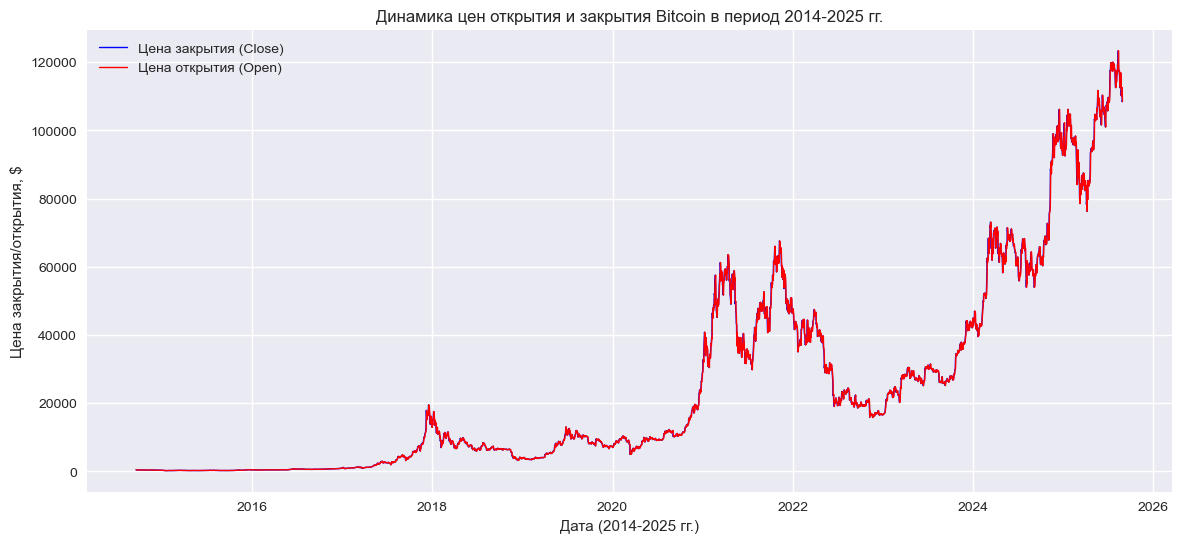

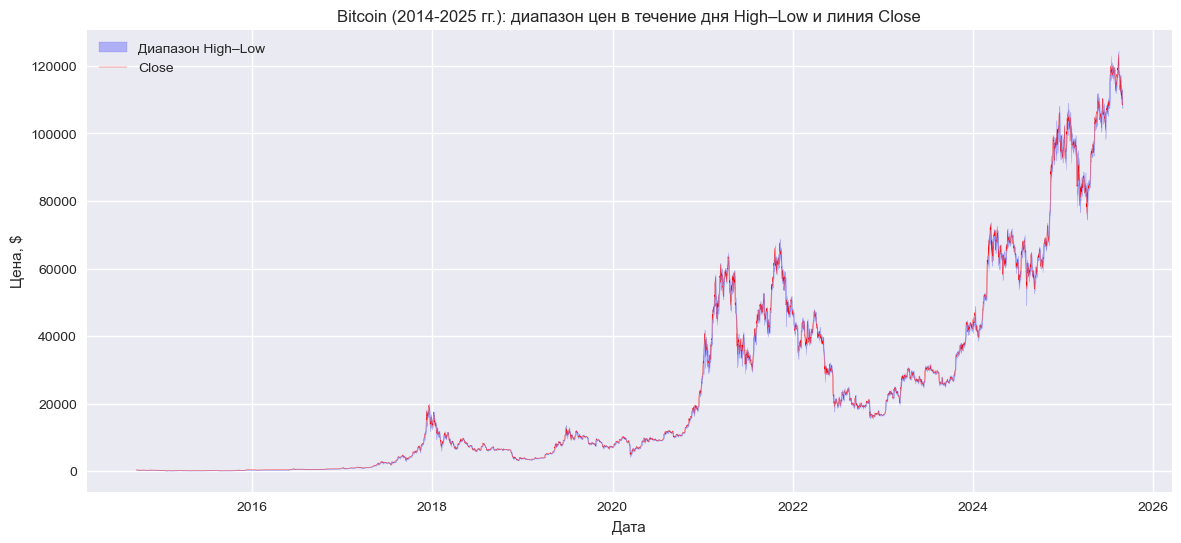

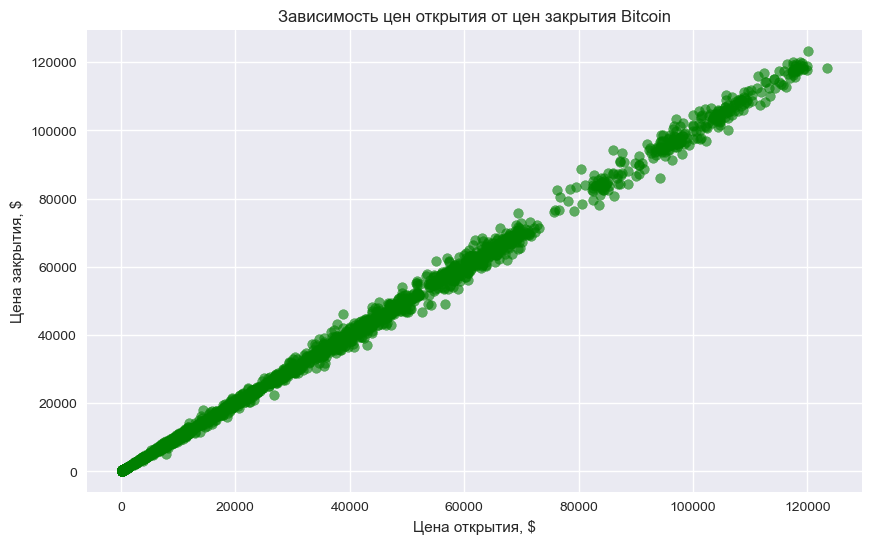

In [149]:
# Построим линейный график цены закрытия в период 2014-2025 гг.

plt.figure(figsize=(14, 6))

# Линия цены закрытия
plt.plot(data["Date"], data["Close"], label="Цена закрытия (Close)", color="blue", linewidth=1)

# Линия цены открытия
plt.plot(data["Date"], data["Open"], label="Цена открытия (Open)", color="red", linewidth=1)

plt.title("Динамика цен открытия и закрытия Bitcoin в период 2014-2025 гг.")
plt.xlabel("Дата (2014-2025 гг.)")
plt.ylabel("Цена закрытия/открытия, $")
plt.legend()
plt.grid(True)
plt.show()

import matplotlib.dates as mdates

# Диапазон High–Low + линия Close
# -------------------------------
x = mdates.date2num(data["Date"].to_numpy())
plt.figure(figsize=(14, 6))
plt.fill_between(x, data["Low"].values, data["High"].values, 
                 alpha=0.25, label="Диапазон High–Low", color="blue")    # волатильность цен в течение дня
plt.plot(x, data["Close"].values, linewidth=0.25, label="Close", color="red")
plt.gca().xaxis_date()
plt.title("Bitcoin (2014-2025 гг.): диапазон цен в течение дня High–Low и линия Close")
plt.xlabel("Дата")
plt.ylabel("Цена, $")
plt.legend()
plt.grid(True)
plt.show()

# # Распределение цен закрытия
# plt.figure(figsize=(6,6))
# sns.boxplot(y=data["Close"], color="violet")
# plt.title("Распределение цен закрытия (Boxplot)")
# plt.ylabel("Цена закрытия, $")
# plt.grid(True, axis="y")
# plt.show()

# Зависимость цены закрытия от цены открытия
plt.figure(figsize=(10,6))
plt.scatter(data["Open"], data["Close"], alpha=0.6, color="green")
plt.title("Зависимость цен открытия от цен закрытия Bitcoin")
plt.xlabel("Цена открытия, $")
plt.ylabel("Цена закрытия, $")
plt.grid(True)
plt.show()

### 3.2. Графические визуализации объемов торгов

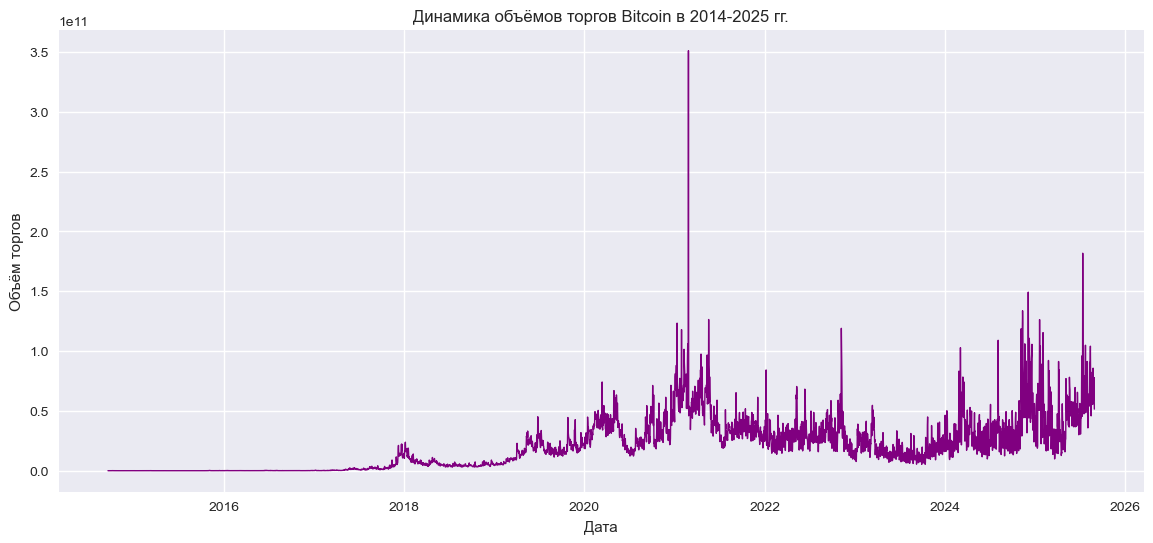

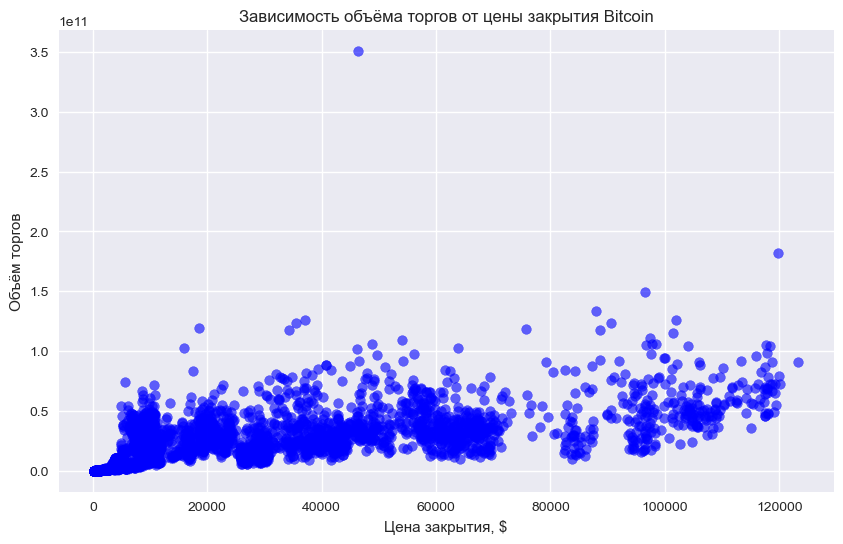

In [150]:
# --- 1) Линейный график объемов ---
plt.figure(figsize=(14,6))
plt.plot(data["Date"], data["Volume"], color="purple", linewidth=1)
plt.title("Динамика объёмов торгов Bitcoin в 2014-2025 гг.")
plt.xlabel("Дата")
plt.ylabel("Объём торгов")
plt.grid(True)
plt.show()

# # --- 2) Boxplot ---
# plt.figure(figsize=(6,6))
# sns.boxplot(y=data["Volume"], color="orange")
# plt.title("Распределение объёмов торгов (Boxplot)")
# plt.ylabel("Объём торгов")
# plt.grid(True, axis="y")
# plt.show()

# --- 3) Scatter Volume vs Close ---
plt.figure(figsize=(10,6))
plt.scatter(data["Close"], data["Volume"], alpha=0.6, color="blue")
plt.title("Зависимость объёма торгов от цены закрытия Bitcoin")
plt.xlabel("Цена закрытия, $")
plt.ylabel("Объём торгов")
plt.grid(True)
plt.show()

---

Для начала исследовательского анализа данных (EDA) сделаем три базовые визуализации:<br>
1.	Распределение цен закрытия (Close) — гистограмма + KDE (непрерывшую функцию плотности распределения).<br>
2.	Распределение дневной доходности (returns).<br>
3.	Корреляции между признаками (Open, High, Low, Close, Volume) — тепловая карта.

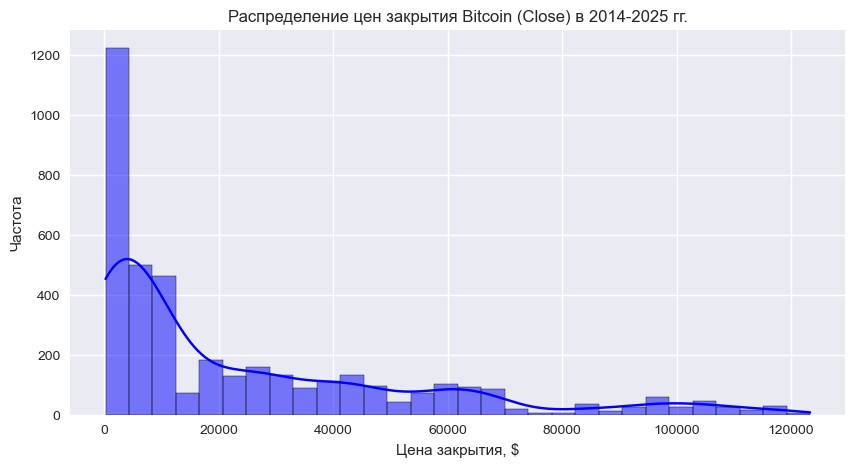

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1) Распределение цен закрытия ---
plt.figure(figsize=(10,5))
sns.histplot(data["Close"], bins=30, kde=True, color="blue")
plt.title("Распределение цен закрытия Bitcoin (Close) в 2014-2025 гг.")
plt.xlabel("Цена закрытия, $")
plt.ylabel("Частота")
plt.grid(True)
plt.show()



**Анализ визуализации "Распределение цен закрытия Bitcoin (Close) в 2014-2025 гг."**:<br>
Сильная асимметрия распределения (правосторонний “длинный хвост”).
Большая часть цен закрытия сосредоточена в диапазоне до \\$20 000, но встречаются и очень высокие значения (до \\$120 000), что растягивает распределение вправо.

Основная масса наблюдений — низкие значения.
Самая высокая частота наблюдается при закрытиях до $10 000. Это характерно для ранних лет наблюдений (2014–2016 гг.), когда стоимость криптовалюты была низкой.

Редкие, но значимые всплески на высоких уровнях.

На графике видны небольшие «пики» в районе \\$20 000, \\$40 000, \\$60 000 и выше. Это отражает исторические «бычьи» циклы и рост стоимости криптовалюты в 2017, 2021 и 2024 годах.

График демонстрирует высокую волатильность
Большой разброс цен и «тяжёлый хвост» указывают на резкие изменения стоимости — типичное свойство криптовалютных активов.

**Итог**: распределение цен закрытия криптовалюты крайне неравномерное, с доминированием низких значений и редкими, но высокими скачками, что подчёркивает спекулятивный характер рынка.

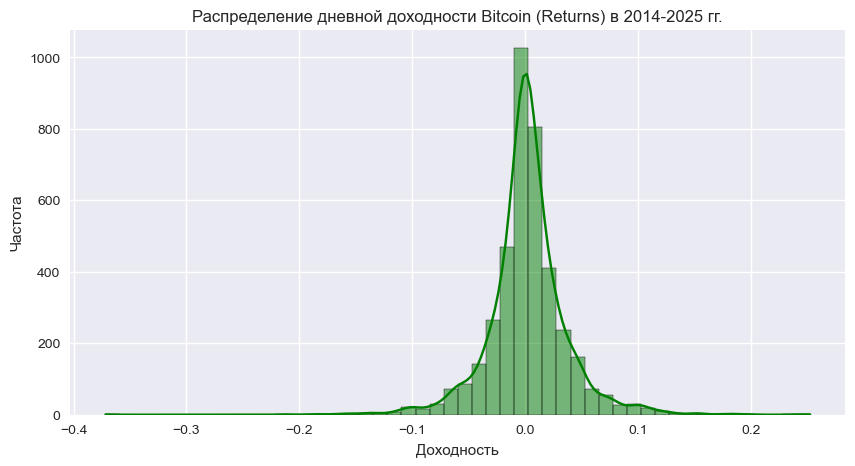

In [152]:
# --- 2) Распределение доходности ---
data["Returns"] = data["Close"].pct_change()  # дневная доходность
plt.figure(figsize=(10,5))
sns.histplot(data["Returns"].dropna(), bins=50, kde=True, color="green")
plt.title("Распределение дневной доходности Bitcoin (Returns) в 2014-2025 гг.")
plt.xlabel("Доходность")
plt.ylabel("Частота")
plt.grid(True)
plt.show()



Дневная доходность (Returns) показывает, насколько изменилась цена закрытия актива по сравнению с предыдущим днём.

Она рассчитывается как относительное изменение цены:
$ R_t = \frac{P_t - P_{t-1}}{P_{t-1}} $.<br>


**Анализ визуализации "Распределение дневной доходности Bitcoin (Returns) в 2014-2025 гг."**:<br>
1.	Центр около нуля<br>
•	Большинство значений доходности сосредоточено рядом с 0%.<br>
•	Это нормально: в большинстве дней цена сильно не меняется.<br>
2.	Форма распределения<br>
•	График напоминает «колокол» (нормальное распределение), но с особенностями:<br>
•	у него более высокие пики в центре;<br>
•	«толстые хвосты» — больше крайних значений, чем у обычной нормальной кривой.<br>
3.	Выбросы<br>
•	Есть дни с изменением цены на ±7–10%, что говорит о резких скачках рынка (всплески волатильности).<br>
<br>
**Вывод:**<br>
	•	Распределение доходностей не идеально нормальное: оно суженное в центре и имеет толстые хвосты.<br>
	•	Это типично для финансовых временных рядов: большинство изменений небольшие, но иногда случаются сильные движения.<br>
	•	Для анализа и прогнозирования важно учитывать такие скачки — простая модель «среднее + нормальное распределение» будет недооценивать риск.<br>

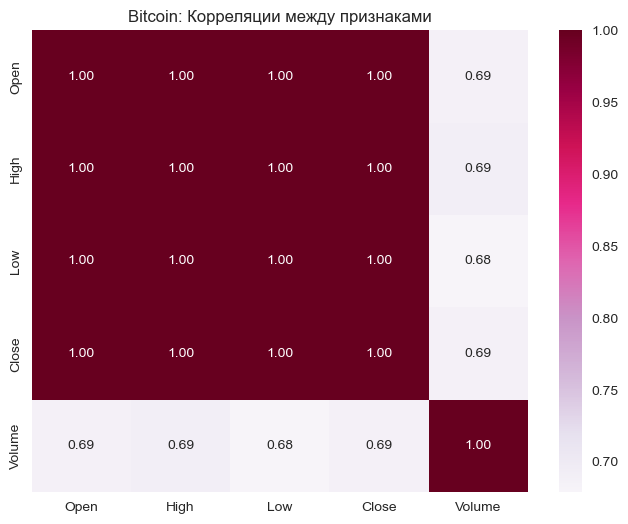

In [153]:
# --- 3) Корреляции между признаками ---
plt.figure(figsize=(8,6))
sns.heatmap(data[["Open","High","Low","Close","Volume"]].corr(),
            annot=True, cmap="PuRd", fmt=".2f")
plt.title("Bitcoin: Корреляции между признаками")
plt.show()

**Анализ визуализации "Корреляции между признаками"**:<br>
1.	Сильная корреляция между ценовыми признаками:<br>
	•	`Open`, `High`, `Low`, `Close` имеют коэффициенты корреляции ~0.98–1.00.<br>
	•	Это ожидаемо: все они отражают одну и ту же динамику цены в течение дня.<br>
2.	Объём торгов (`Volume`) коррелирует слабо:<br>
	•	`Volume` имеет среднюю корреляцию с ценами: ~0.69.<br>
	•	Это значит, что объёмы не всегда напрямую связаны с уровнем цен. Иногда высокий объём сопровождается ростом, иногда падением.<br>
3.	Практическое значение для анализа:<br>
	•	В модели нет смысла одновременно использовать все четыре ценовых признака (`Open`, `High`, `Low`, `Close`), т.к. они дают почти одинаковую информацию → это приведёт к мультиколлинеарности. Целесообразнее выбрать один признак.<br>
	•	`Volume` может добавить ценную информацию, т.к. несёт другую динамику.<br>
<br>
**Вывод:**<br>
	•	Ценовые признаки (`Open`, `High`, `Low`, `Close`) сильно дублируют друг друга.<br>
	•	Для прогнозирования цены можно оставить только `Close`.<br>
	•	`Volume` стоит проанализировать отдельно — он может быть полезным дополнительным индикатором, особенно при поиске паттернов волатильности и «объёмных аномалий».<br>


### 3.3. Проверка корреляции цен закрытия Bitcoin с другими активами: золото, нефть, индийская рупия

Для анализа взаимосвязей с ценой Bitcoin в исследовании были выбраны следующие фонды: золото, нефть и индийская рупия. 
Выбор этих инструментов обусловлен их экономическим и рыночным значением:

- **Золото** традиционно рассматривается как защитный актив и «тихая гавань» в периоды нестабильности. 
  Оно часто противопоставляется рисковым инвестициям, таким как криптовалюты, и поэтому позволяет выявить возможную 
  обратную или прямую корреляцию между рынком драгоценных металлов и динамикой Bitcoin.

- **Нефть** является ключевым сырьевым товаром мировой экономики и индикатором глобальных экономических циклов. 
  Колебания нефтяных цен могут оказывать влияние на поведение инвесторов и общую ликвидность рынков, включая рынок криптовалют.

- **Индийская рупия** была выбрана как пример валюты развивающегося рынка. Индия является одним из крупнейших мировых 
  рынков потребления криптовалют, и изменения курса национальной валюты могут отражаться на спросе на Bitcoin со стороны 
  локальных инвесторов. Таким образом, рупия интересна как индикатор потенциального влияния валютных факторов на цену криптовалюты.

Таким образом, включение в анализ золота, нефти и индийской рупии позволило оценить возможные взаимосвязи цены Bitcoin 
с ключевыми мировыми активами из разных классов: драгоценные металлы, сырьевые товары и валюты.


In [154]:
# Выгрузка данных о золоте, индийской рупии, нефти.
# данные берем за тот же период и с таким же датафреймом как в нашем очищенном датасете (2014-2025 гг., день).
# далее - графическая проверка корреляции

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === 1) Базовый BTC-датасет (в 2014-2025 гг., дневной) ===
btc = pd.read_csv("data_crypto_clear.csv", parse_dates=["Date"])
btc = btc.sort_values("Date").reset_index(drop=True)
btc_2025 = btc[(btc["Date"] >= "2014-09-17") & (btc["Date"] <= "2025-12-31")].copy()

start_date = btc_2025["Date"].min()
end_date   = btc_2025["Date"].max()

# === 2) Скачиваем активы одним вызовом ===
tickers = {
    "Gold": "GC=F",   # золото (фьючерсы)
    "Oil" : "CL=F",   # нефть WTI (фьючерсы)
    "INR" : "INR=X",  # USD/INR (рост = ослабление рупии)
}
raw = yf.download(list(tickers.values()), auto_adjust=False,
                  start=start_date, end=end_date, interval="1d",
                  progress=False, group_by="column")

# Вытаскиваем "Close" корректно для случая MultiIndex-колонок
# (при нескольких тикерах yfinance делает столбцы с уровнями)
if isinstance(raw.columns, pd.MultiIndex):
    close_assets = raw["Close"].copy()
else:
    # на всякий случай, если вдруг вернулся одиночный уровень
    close_assets = raw[["Close"]].copy()

# Переименовываем колонки на удобные имена
close_assets = close_assets.rename(columns={v: k for k, v in tickers.items()})

# Индекс -> столбец Date, убираем TZ, сортируем
close_assets = close_assets.copy()
close_assets.index = pd.to_datetime(close_assets.index)
# если индекс вдруг TZ-aware, обнулим таймзону
try:
    close_assets.index = close_assets.index.tz_localize(None)
except Exception:
    pass
close_assets = close_assets.sort_index().reset_index().rename(columns={"index": "Date"})

# === 3) Собираем единый датафрейм по датам ===
btc_close = btc_2025[["Date", "Close"]].rename(columns={"Close": "BTC"})
merged = btc_close.merge(close_assets, on="Date", how="inner")

print("Диапазон дат:", merged["Date"].min().date(), "—", merged["Date"].max().date())
display(merged.head(15))
display(merged.info())

Диапазон дат: 2014-09-17 — 2025-08-29


,Date,BTC,Oil,Gold,INR
0,2014-09-17,457.334015,94.419998,1234.400024,61.053001
1,2014-09-18,424.440002,93.070000,1225.699951,60.908001
2,2014-09-19,394.795990,92.410004,1215.300049,60.689999
3,2014-09-22,402.152008,91.519997,1216.800049,60.853001
4,2014-09-23,435.790985,91.559998,1221.000000,61.000000
5,2014-09-24,423.204987,92.800003,1218.599976,60.980000
6,2014-09-25,411.574005,92.529999,1221.199951,60.810001
7,2014-09-26,404.424988,93.540001,1214.099976,61.490002
8,2014-09-29,375.467010,94.570000,1217.500000,61.138000
9,2014-09-30,386.944000,91.160004,1210.500000,61.553001


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2856 non-null   datetime64[ns]
 1   BTC     2856 non-null   float64       
 2   Oil     2755 non-null   float64       
 3   Gold    2754 non-null   float64       
 4   INR     2852 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 111.7 KB


None

**Корреляция между признаками датасета c ценами закрытия Bitcoin, нефти, золота и индийской рупии**

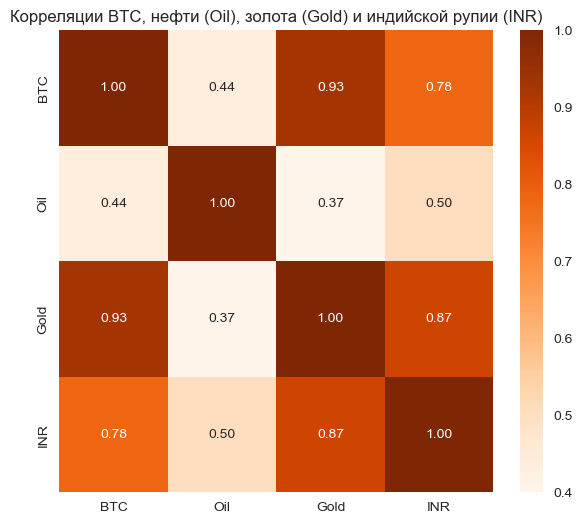

In [155]:
# === Тепловая карта корреляции ===

import seaborn as sns

corr_df = merged.drop(columns='Date')
corr_mat = corr_df.corr()

plt.figure(figsize=(7,6))
sns.heatmap(corr_df.corr(), annot=True, cmap="Oranges", vmin=0.4, vmax=1, fmt=".2f")
plt.title("Корреляции BTC, нефти (Oil), золота (Gold) и индийской рупии (INR)")
plt.show()

**Вывод**:<br>
* корреляция между биткойном и нефтью слабая (~0.44) => нецелесообразно использовать данные фонды для предсказания.
* достаточно сильная коррелляция между биткойном и золотом (~0.93) => **цены закрытия золота могут быть использованы для предсказания**.
* корреляция между биткойном и рупией есть, но несильная (~0.78) => цены закрытия индийской рупии могут быть использованы для предсказания.

In [156]:
# Сохранение полученного датасета с ценами закрытия фондов
merged.to_csv('data_crypto_founds.csv', index=False)

### 3.4. Расчет дополнительных признаков (идентификаторов)

*В работе будут рассмотрены одни из наиболее распространённых технических индикаторов, применяемых в биржевом трейдинге: SMA, MACD и ATR.*

## Скользящие средние SMA(50) и SMA(200)

**SMA (Simple Moving Average)** — простое скользящее среднее, один из ключевых индикаторов технического анализа, используемый для выявления направления тренда и сглаживания колебаний цены. В отличие от краткосрочных SMA, долгосрочные средние позволяют увидеть общую тенденцию рынка.

SMA рассчитывается как среднее арифметическое цен закрытия (или других выбранных цен) за фиксированное число последних периодов. В случае SMA(50) берётся 50 последних дней (свечей) и вычисляется среднее значение:.
$$
\mathrm{SMA}_n(t)=\frac{1}{n}\sum_{i=0}^{n-1} \mathrm{Close}_{t-i}
$$

* SMA(50) отражает среднесрочный тренд (около 2,5 месяца торговых дней).
* SMA(200) показывает долгосрочную тенденцию (около 10 месяцев торговых дней).

В исследовании SMA(50) и SMA(200) включены как признаки (идентификаторы), отражающие одновременно краткосрочные и долгосрочные тенденции цены биткойна. Их совместное использование позволяет модели учитывать не только последние изменения, но и более устойчивую динамику рынка, что может повысить точность прогнозирования цены закрытия.

Он помогает учесть среднесрочную динамику рынка и может быть полезен для выявления текущего направления тренда, а также в комбинации с другими индикаторами (например, MACD).

---

## MACD (12, 26, 9)

**MACD (Moving Average Convergence Divergence)** — индикатор технического анализа, который измеряет расхождение и схождение двух экспоненциальных скользящих средних (EMA) с разными периодами. Он помогает выявлять силу и направление тренда, а также возможные моменты его разворота.

MACD состоит из трёх компонентов:
1. Линия MACD — разница между короткой EMA и длинной EMA:
$$
\mathrm{MACD}_t=\mathrm{EMA}_{12}(t)-\mathrm{EMA}_{26}(t),\qquad
$$
2. Сигнальная линия — сглаженное значение MACD за 9 периодов:
$$
\mathrm{Signal}_t=\mathrm{EMA}_9(\mathrm{MACD})_t,
$$
3. Гистограмма — разница между линией MACD и сигнальной линией:
$$
\mathrm{Histogram}_t=\mathrm{MACD}_t-\mathrm{Signal}_t.
$$

В проекте используется MACD (12, 26, 9):
* EMA(12) отражает краткосрочную динамику цены,
* EMA(26) — более долгосрочную тенденцию,
* EMA(9) по линии MACD выступает фильтром сигналов.<br><br>
MACD служит важным признаком, так как он сочетает в себе свойства как трендового индикатора, так и осциллятора, что делает его универсальным инструментом для анализа криптовалютного рынка.

---

## ATR (Average True Range, 14)

**ATR (Average True Range)** — индикатор технического анализа, используемый для измерения волатильности рынка, то есть средней амплитуды колебаний цены за определённый период. ATR не показывает направление тренда (рост или падение), а отражает только силу и интенсивность движений.



1. Сначала вычисляется Истинный диапазон (True Range, TR) для каждого дня:
$$
\mathrm{TR}_t=\max\Big(
\mathrm{High}_t-\mathrm{Low}_t,\;
|\mathrm{High}_t-\mathrm{Close}_{t-1}|,\;
|\mathrm{Low}_t-\mathrm{Close}_{t-1}|
\Big),
$$
где
* $\mathrm{High}_t$ — максимум дня,
* $\mathrm{Low}_t$ — минимум дня,
* $\mathrm{Close}_{t-1}$ — цена закрытия предыдущего дня.

2. Далее рассчитывается средний истинный диапазон (ATR) за 𝑛 периодов (в нашем случае 𝑛=14) с помощью скользящего среднего:
$$
\mathrm{ATR}_n(t)=\mathrm{SMA}_n(\mathrm{TR})_t.
$$

В своем исследовании ATR(14) использую для характеристики волатильности цены биткойна. Этот индикатор помогает учитывать не только направление движения, но и «силу» колебаний рынка. При прогнозировании цен он может быть полезен как дополнительный признак, отражающий фазу рынка — спокойную или турбулентную.

In [157]:
# выгрузим сохраненный очищенный датасет 'data_crypto_clear.csv'
data = pd.read_csv('data_crypto_clear.csv')

# Преобразуем формат даты (object) в datetime и остальные форматы в числовые
data["Date"] = pd.to_datetime(data["Date"], errors="coerce")

for c in ["Open","High","Low","Close","Volume"]:
    data[c] = pd.to_numeric(data[c], errors="coerce")

display(data.head(10))

# Посмотрим типы данных в датасете и статистические данные
display(data.info())
display(data.describe())

,Date,Close,High,Low,Open,Volume
0,2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
1,2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2,2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
3,2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
4,2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100
5,2014-09-22,402.152008,406.915985,397.130005,399.100006,24127600
6,2014-09-23,435.790985,441.557007,396.196991,402.092010,45099500
7,2014-09-24,423.204987,436.112000,421.131989,435.751007,30627700
8,2014-09-25,411.574005,423.519989,409.467987,423.156006,26814400
9,2014-09-26,404.424988,414.937988,400.009003,411.428986,21460800


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4001 non-null   datetime64[ns]
 1   Close   4001 non-null   float64       
 2   High    4001 non-null   float64       
 3   Low     4001 non-null   float64       
 4   Open    4001 non-null   float64       
 5   Volume  4001 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 187.7 KB


None

,Date,Close,High,Low,Open,Volume
count,4001,4001.000000,4001.000000,4001.000000,4001.000000,4.001000e+03
mean,2020-03-09 00:00:00,24503.271694,24987.421386,23943.375428,24477.318038,2.046297e+10
min,2014-09-17 00:00:00,178.102997,211.731003,171.509995,176.897003,5.914570e+06
25%,2017-06-13 00:00:00,2464.580078,2537.159912,2332.989990,2446.239990,1.043740e+09
50%,2020-03-09 00:00:00,10233.900391,10434.922852,9946.675781,10230.365234,1.641803e+10
75%,2022-12-04 00:00:00,38794.972656,39835.140625,37629.359375,38794.464844,3.187828e+10
max,2025-08-30 00:00:00,123344.062500,124457.117188,118959.195312,123339.398438,3.509679e+11
std,NaN,29047.501726,29547.562853,28470.604638,29020.457632,2.180934e+10


In [158]:
# ======== расчет и добавление индикаторов ========
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = data.copy()

# (опционально) ограничить показ последними N днями для наглядности
# N = 180
# df = df.tail(N).reset_index(drop=True)

# ---- 1) Индикаторы ----

# 1.1) SMA 10/100
df["SMA_50"]  = df["Close"].rolling(window=50,  min_periods=1).mean()
df["SMA_200"] = df["Close"].rolling(window=200, min_periods=1).mean()

# 1.2) MACD (12, 26, 9)
ema12 = df["Close"].ewm(span=12, adjust=False).mean()
ema26 = df["Close"].ewm(span=26, adjust=False).mean()
df["MACD"] = ema12 - ema26
df["MACD_signal"] = df["MACD"].ewm(span=9, adjust=False).mean()
df["MACD_hist"] = df["MACD"] - df["MACD_signal"]

# 1.3) ATR (Average True Range, 14)
atr_window = 14
df["H-L"] = df["High"] - df["Low"]
df["H-C"] = (df["High"] - df["Close"].shift()).abs()
df["L-C"] = (df["Low"]  - df["Close"].shift()).abs()
df["TR"]  = df[["H-L","H-C","L-C"]].max(axis=1)
df["ATR_14"] = df["TR"].rolling(atr_window, min_periods=1).mean()
# ---- 3) Чистка временных служебных колонок (далее не нужны) ----
df.drop(columns=["L14","H14","H-L","H-C","L-C","TR"], inplace=True, errors="ignore")

df.head(15)

,Date,Close,High,Low,Open,Volume,SMA_50,SMA_200,MACD,MACD_signal,MACD_hist,ATR_14
0,2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800,457.334015,457.334015,0.000000,0.000000,0.000000,15.752014
1,2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200,440.887009,440.887009,-2.624024,-0.524805,-2.099219,29.991013
2,2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700,425.523336,425.523336,-7.014744,-1.822793,-5.191951,34.428335
3,2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600,421.368500,421.368500,-9.249402,-3.308115,-5.941288,34.174500
4,2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100,416.859003,416.859003,-11.699137,-4.986319,-6.712818,31.188599
5,2014-09-22,402.152008,406.915985,397.130005,399.100006,24127600,414.407837,414.407837,-13.219400,-6.632935,-6.586465,27.621496
6,2014-09-23,435.790985,441.557007,396.196991,402.092010,45099500,417.462572,417.462572,-11.576391,-7.621626,-3.954764,30.155570
7,2014-09-24,423.204987,436.112000,421.131989,435.751007,30627700,418.180374,418.180374,-11.161219,-8.329545,-2.831674,28.258625
8,2014-09-25,411.574005,423.519989,409.467987,423.156006,26814400,417.446333,417.446333,-11.636576,-8.990951,-2.645625,26.680111
9,2014-09-26,404.424988,414.937988,400.009003,411.428986,21460800,416.144199,416.144199,-12.446688,-9.682099,-2.764590,25.504999


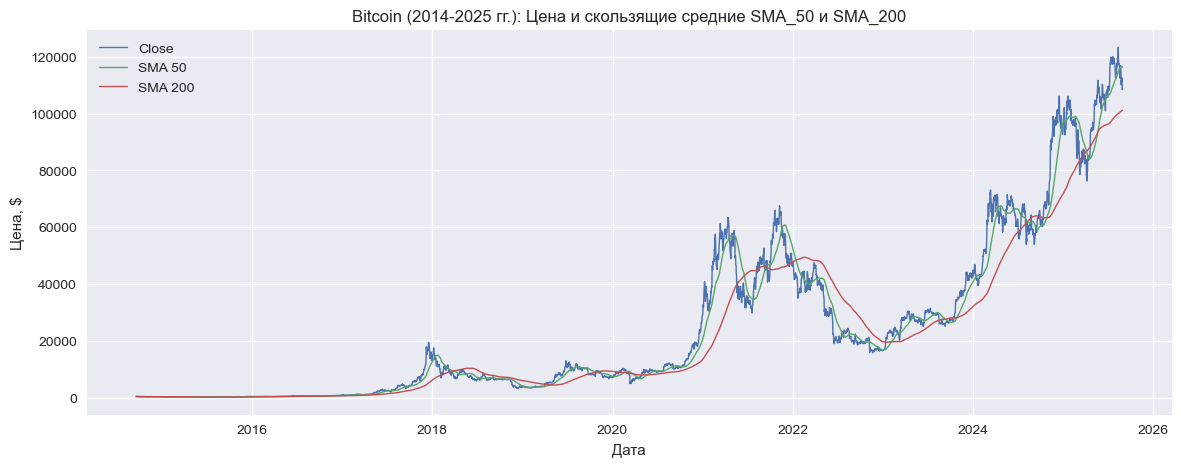

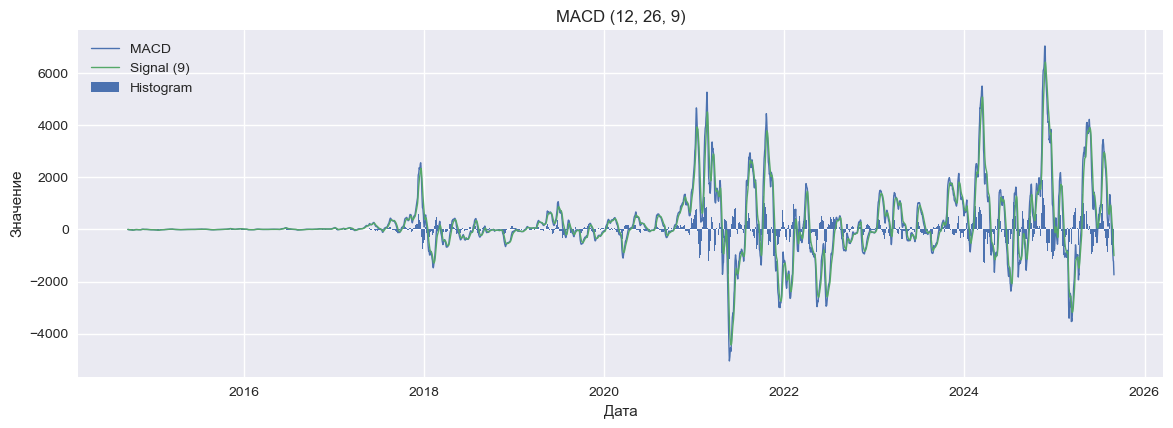

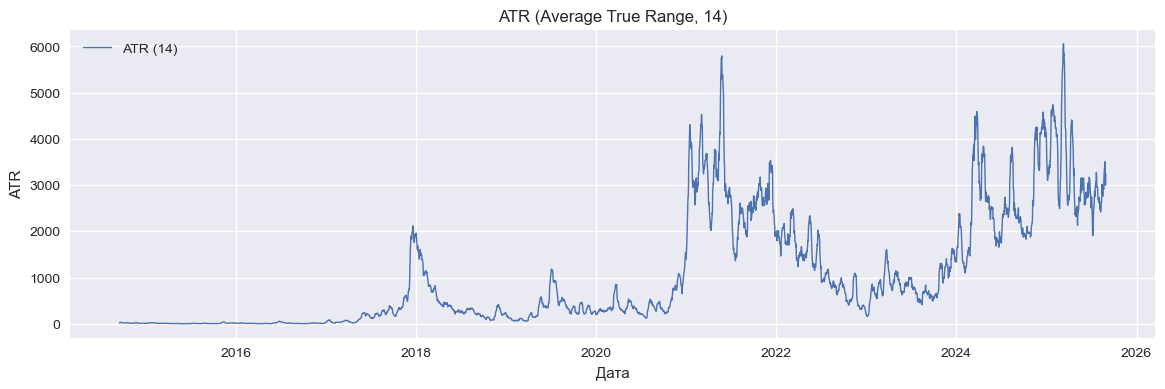

In [159]:
# ---- 2) Визуализации ----
# Стиль и цвета не фиксируем — всё по умолчанию matplotlib.

# 2.1) Цена + SMA(50/200)
plt.figure(figsize=(14, 5))
plt.plot(df["Date"], df["Close"], linewidth=1, label="Close")
plt.plot(df["Date"], df["SMA_50"], linewidth=1, label="SMA 50")
plt.plot(df["Date"], df["SMA_200"], linewidth=1, label="SMA 200")
plt.title("Bitcoin (2014-2025 гг.): Цена и скользящие средние SMA_50 и SMA_200")
plt.xlabel("Дата"); plt.ylabel("Цена, $")
plt.legend(); plt.grid(True)
plt.show()

# 2.2) MACD (12,26,9)
plt.figure(figsize=(14, 4.5))
plt.plot(df["Date"], df["MACD"], linewidth=1, label="MACD")
plt.plot(df["Date"], df["MACD_signal"], linewidth=1, label="Signal (9)")
plt.bar(df["Date"], df["MACD_hist"], width=1.0, label="Histogram")
plt.title("MACD (12, 26, 9)")
plt.xlabel("Дата"); plt.ylabel("Значение")
plt.legend(); plt.grid(True)
plt.show()

# 2.3) ATR (14)
plt.figure(figsize=(14, 4))
plt.plot(df["Date"], df["ATR_14"], linewidth=1, label=f"ATR ({atr_window})")
plt.title("ATR (Average True Range, 14)")
plt.xlabel("Дата"); plt.ylabel("ATR")
plt.legend(); plt.grid(True)
plt.show()

# Готово: df содержит рассчитанные индикаторы, графики выведены.

Корреляции индикаторов с Close:
SMA_50       0.989122
SMA_200      0.960193
ATR_14       0.872792
MACD_hist   -0.024393
Name: Close, dtype: float64


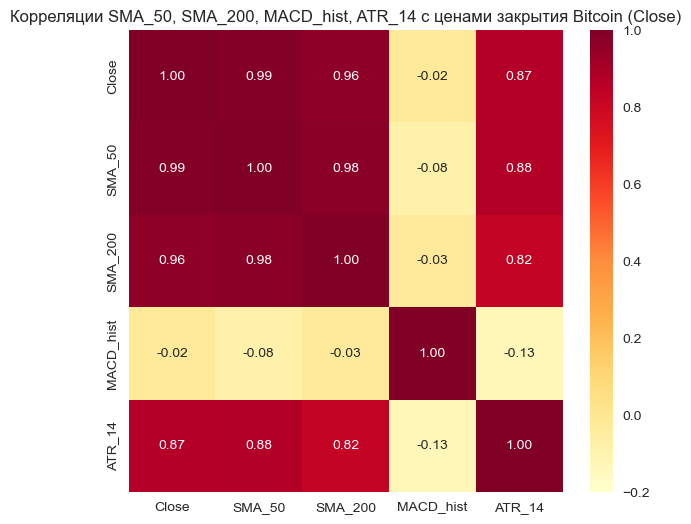

In [160]:
# === Корреляции с Close  ===
features = ["SMA_50","SMA_200","MACD_hist","ATR_14"]
corr_df = df[["Close"] + features].dropna()
corr_close = corr_df.corr().loc[features, "Close"].sort_values(ascending=False)

print("Корреляции индикаторов с Close:")
print(corr_close)

#==============================

# === 3) Тепловая карта (Close + индикаторы) на matplotlib ===
corr_mat = corr_df.corr()

plt.figure(figsize=(7,6))
sns.heatmap(corr_df.corr(), annot=True, cmap="YlOrRd", vmin=-0.2, vmax=1, fmt=".2f")
plt.title("Корреляции SMA_50, SMA_200, MACD_hist, ATR_14 с ценами закрытия Bitcoin (Close)")
plt.show()

**Вывод**: <br>
на тепловой карте видна сильная корреляцая с SMA_50 и SMA_200 (\~0.96-0.99) и достаточно сильная с ATR_14 (~0.87) => **данные идентификаторы могут быть использованы для предсказания**.

---

### 3.5. Формирование итогового датасета с коррелирующими признаками

In [161]:
# ===== Сформированные датасеты =====
# датасет с идентификаторами
df

,Date,Close,High,Low,Open,Volume,SMA_50,SMA_200,MACD,MACD_signal,MACD_hist,ATR_14
0,2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800,457.334015,457.334015,0.000000,0.000000,0.000000,15.752014
1,2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200,440.887009,440.887009,-2.624024,-0.524805,-2.099219,29.991013
2,2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700,425.523336,425.523336,-7.014744,-1.822793,-5.191951,34.428335
3,2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600,421.368500,421.368500,-9.249402,-3.308115,-5.941288,34.174500
4,2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100,416.859003,416.859003,-11.699137,-4.986319,-6.712818,31.188599
...,...,...,...,...,...,...,...,...,...,...,...,...
3996,2025-08-26,111802.656250,112397.015625,108762.039062,110124.101562,69396320317,116578.357813,100931.125156,-1035.359406,-328.303864,-707.055542,3506.690848
3997,2025-08-27,111222.062500,112619.414062,110398.265625,111795.710938,62137056409,116623.793594,101004.823203,-1202.538783,-503.150848,-699.387936,3326.571429
3998,2025-08-28,112544.804688,113450.078125,110900.921875,111219.054688,58860155962,116648.158594,101085.046758,-1214.297736,-645.380225,-568.917511,2994.208705
3999,2025-08-29,108410.835938,112619.054688,107559.625000,112550.523438,77843379644,116496.631250,101139.913164,-1539.447725,-824.193725,-715.254000,3179.329241


In [162]:
# датасет с очищенными данными по биткойну
data

,Date,Close,High,Low,Open,Volume
0,2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
1,2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2,2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
3,2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
4,2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100
...,...,...,...,...,...,...
3996,2025-08-26,111802.656250,112397.015625,108762.039062,110124.101562,69396320317
3997,2025-08-27,111222.062500,112619.414062,110398.265625,111795.710938,62137056409
3998,2025-08-28,112544.804688,113450.078125,110900.921875,111219.054688,58860155962
3999,2025-08-29,108410.835938,112619.054688,107559.625000,112550.523438,77843379644


In [163]:
# датасет с ценами закрытия биткойна, нефти, золота и инд. рупии
merged

,Date,BTC,Oil,Gold,INR
0,2014-09-17,457.334015,94.419998,1234.400024,61.053001
1,2014-09-18,424.440002,93.070000,1225.699951,60.908001
2,2014-09-19,394.795990,92.410004,1215.300049,60.689999
3,2014-09-22,402.152008,91.519997,1216.800049,60.853001
4,2014-09-23,435.790985,91.559998,1221.000000,61.000000
...,...,...,...,...,...
2851,2025-08-25,110124.351562,64.800003,3373.800049,87.330101
2852,2025-08-26,111802.656250,63.250000,3388.600098,87.608597
2853,2025-08-27,111222.062500,64.150002,3404.600098,87.600700
2854,2025-08-28,112544.804688,64.599998,3431.800049,87.659103


**(!) Важно**:  В датасете с ценами закрытия биткойна, нефти, золота и инд. рупии количество строк меньше, т.к. биржевые торги по традиционным активам не осуществляются в выходные и праздничные дни, в отличие от рынка криптовалют. Поэтому далее в работе будем использовать датасет с наиболее коррелирующими признаками, опираясь на даты торгов традиционных активов.

In [164]:
# Создадим новый датасет с ценами закрытия и объемами биткойна и коррелирующими столбцами из остальных датасетов (идектификаторы и традиционные активы
# data[["Date", "Close", "Volume"]] + df[["Date", "SMA_50", "SMA_200", "ATR_14"]] + merged[["Date", "Gold", "INR"]] через inner join через Date

final_merged = data[["Date", "Close", "Volume"]].merge(
    df[["Date", "SMA_50", "SMA_200", "ATR_14"]],
    on="Date",
    how="inner"
)

final_merged = final_merged.merge(
    merged[["Date", "Gold", "INR"]],
    on="Date",
    how="inner"
)

final_merged

,Date,Close,Volume,SMA_50,SMA_200,ATR_14,Gold,INR
0,2014-09-17,457.334015,21056800,457.334015,457.334015,15.752014,1234.400024,61.053001
1,2014-09-18,424.440002,34483200,440.887009,440.887009,29.991013,1225.699951,60.908001
2,2014-09-19,394.795990,37919700,425.523336,425.523336,34.428335,1215.300049,60.689999
3,2014-09-22,402.152008,24127600,414.407837,414.407837,27.621496,1216.800049,60.853001
4,2014-09-23,435.790985,45099500,417.462572,417.462572,30.155570,1221.000000,61.000000
...,...,...,...,...,...,...,...,...
2851,2025-08-25,110124.351562,85706860190,116508.301719,100854.757305,3395.174665,3373.800049,87.330101
2852,2025-08-26,111802.656250,69396320317,116578.357813,100931.125156,3506.690848,3388.600098,87.608597
2853,2025-08-27,111222.062500,62137056409,116623.793594,101004.823203,3326.571429,3404.600098,87.600700
2854,2025-08-28,112544.804688,58860155962,116648.158594,101085.046758,2994.208705,3431.800049,87.659103


In [165]:
# сохраним итоговый датасет с коррелирующими признаками - данный датасет далее в проекте будет использоваться для обучения и прогнозирования
final_merged.to_csv('final_merged_correllated.csv', index=False)

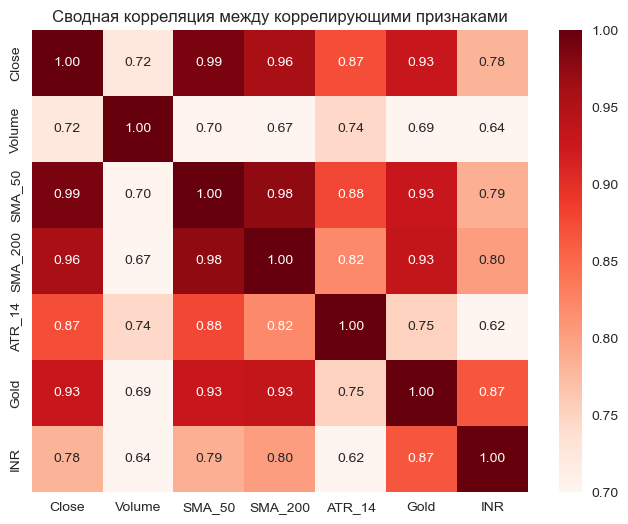

In [166]:
final_merged_corr = final_merged.drop(columns=["Date"])
plt.figure(figsize=(8,6))
sns.heatmap(final_merged_corr.corr(),
            annot=True, cmap="Reds", vmin=0.7, vmax=1, fmt=".2f")
plt.title("Сводная корреляция между коррелирующими признаками")
plt.show()

**Сила корреляции с ценой закрытия биткойна**:
1. SMA_50 (~0.99)
2. SMA_200 (~0.96)
3. Gold (~0.93)
4. ATR_14 (~0.87)
5. INR (~0.78)

---

### 3.6. Декомпозиция временного ряда

**Декомпозиция временного ряда** — это метод статистического анализа, позволяющий разложить наблюдаемый процесс на несколько составляющих: тренд, сезонность и остаточную часть (шум). Такой подход широко применяется в экономике, финансах и аналитике временных данных, так как он помогает выявить скрытые закономерности и структурные особенности динамики показателя.

* **Тренд** отражает долгосрочную тенденцию изменения ряда и позволяет оценить направление его развития во времени.

* **Сезонность** фиксирует регулярные колебания, повторяющиеся с определённой периодичностью (дни недели, месяцы, кварталы).

* **Остаток** показывает непредсказуемые флуктуации, которые не объясняются ни трендом, ни сезонностью, и часто связаны с внешними случайными факторами.

Применение декомпозиции в рамках нашего проекта даёт несколько ключевых преимуществ:
- Позволяет провести качественный анализ структуры временного ряда и понять, какие компоненты оказывают наибольшее влияние на динамику цены биткоина.
- Обеспечивает наглядную визуализацию скрытых закономерностей (долгосрочный рост, повторяющиеся циклы, периоды высокой волатильности).
- Создаёт основу для выбора и обоснования дальнейших методов прогнозирования: понимание характера тренда и сезонности позволяет более осознанно применять модели ARIMA, SARIMA и их модификации.

В рамках данного проекта декомпозиция даёт возможность определить, в какой мере цена биткоина обусловлена устойчивым долгосрочным ростом, в какой — циклическими факторами, и какая доля остаётся за случайными колебаниями. Ожидаемым результатом является выявление устойчивого тренда, повторяющихся сезонных паттернов и нерегулярных остатков, которые послужат базой для перехода к более формализованным моделям прогнозирования.

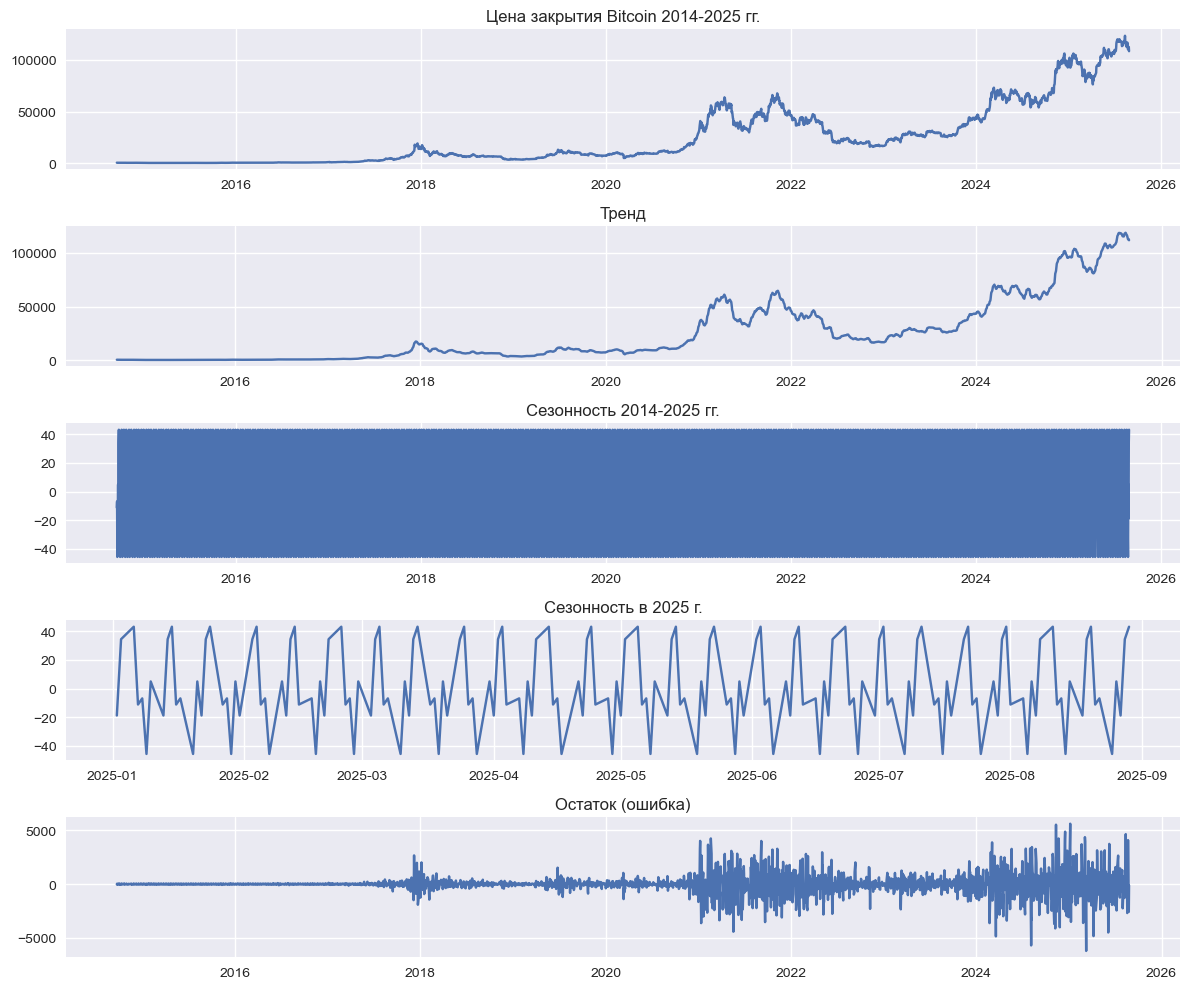

In [167]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 1) Загружаем итоговый датасет с коррелирующими признаками
df = pd.read_csv("final_merged_correllated.csv", parse_dates=["Date"]).sort_values("Date")
ts = df.set_index("Date")["Close"].astype(float)

# 2) Разложение (период сезонности: напр. 7 — недельная для дневных данных)
result = seasonal_decompose(ts, model="additive", period=7)  # или model="multiplicative"

# 3) Графики: наблюдение, тренд, сезонность, остаток (ошибка)
plt.figure(figsize=(12,10))
plt.subplot(5,1,1); plt.plot(ts);                 plt.title("Цена закрытия Bitcoin 2014-2025 гг.")
plt.subplot(5,1,2); plt.plot(result.trend);       plt.title("Тренд")
plt.subplot(5,1,3); plt.plot(result.seasonal);    plt.title("Сезонность 2014-2025 гг.")
plt.subplot(5,1,4); plt.plot(result.seasonal.loc['2025-01-01':'2025-08-31']);      plt.title("Сезонность в 2025 г.")
plt.subplot(5,1,5); plt.plot(result.resid);       plt.title("Остаток (ошибка)")
plt.tight_layout(); plt.show()

**Вывод по декомпозиции временного ряда цены закрытия BTC:**<br>

Декомпозиция временного ряда цены закрытия биткоина за 2014–2025 гг. позволила выделить три ключевые компоненты: тренд, сезонность и остаточную часть.

1. **Трендовая составляющая** демонстрирует долгосрочный восходящий характер ряда, сопровождающийся резкими скачками и периодами коррекций. Данный результат подтверждает, что долгосрочная динамика биткоина подвержена значительным структурным изменениям, однако сохраняет общий положительный вектор развития.

2. **Сезонная компонента** указывает на наличие повторяющихся колебаний. На укрупнённом масштабе сезонность визуально теряется в силу высокой частоты циклов, однако при анализе ограниченного интервала (например, одного календарного года) выявляются устойчивые повторяющиеся паттерны с амплитудой до ±50 единиц. Это говорит о том, что сезонные колебания имеют место, но их вклад относительно мал по сравнению с трендовыми изменениями и внешними шоками.

3. **Остаточная компонента** (ошибка) выявляет нерегулярные и зачастую резкие отклонения, наиболее ярко выраженные в периоды кризисов и бурного роста (2017–2018 гг., 2021 г., 2024–2025 гг.). Характер остатков указывает на наличие значительных внешних факторов, не учитываемых базовой моделью «тренд + сезонность». Кроме того, наблюдается неравномерность дисперсии: в спокойные периоды остатки малы, в периоды высокой волатильности они возрастают кратно. Такая структура остатков характерна для финансовых временных рядов.

Таким образом, простая декомпозиция даёт ценную информацию о структуре ряда, но оказывается недостаточной для построения прогноза. Для учёта автокорреляций, сезонных факторов и волатильности целесообразно переходить к более гибким моделям временных рядов, в частности к классическим стохастическим моделям — **ARIMA** и её расширению **SARIMA**, которые позволяют описывать как трендово-сезонные компоненты, так и стохастическую структуру ошибок.


---

Разведочный анализ данных (EDA) и декомпозиция ряда показали три важные вещи: (1) у цены закрытия биткоина есть длительный восходящий тренд, (2) сезонные колебания существуют, но заметно слабее тренда, (3) в периоды резких движений остаётся значительная «необъяснённая» часть, связанная с внешними факторами и общерыночной волатильностью. Эти наблюдения задают логику моделирования: мы начинаем с простых и интерпретируемых подходов, затем постепенно переходим к моделям, способным учитывать нелинейность и более богатый набор признаков.

Цель этого раздела — получить прогноз **цены закрытия на следующий день (t+1)** и честно сравнить модели на одинаковом тестовом интервале. Чтобы избежать утечки информации, все операции масштабирования выполняются только на обучающей части, разбиение делается по времени, а качество оценивается по RMSE, MAE и MAPE в исходных единицах (USD). По мере усложнения мы сохраняем сопоставимость: одинаковый горизонт прогноза, одинаковые правила разбиения, единые метрики.

Последовательность и состав моделей в проекте:

1. **LinearRegression (на лагах `Close`)** — базовая линия; проверяем, насколько хорошо работает простая инерционная связь «вчера → завтра».
2. **ARIMA** и **SARIMA** — классические модели временных рядов с учётом автокорреляции и (в SARIMA) сезонности;
   дополнительно применяем **Auto-ARIMA/SARIMA** для автоматического подбора параметров по информационным критериям.
3. **Random Forest** и **XGBoost** (регрессия) — нелинейные ансамбли деревьев; проверяем их способность ловить сложные зависимости на коротком горизонте.
4. **LSTM (только `Close`)** — рекуррентная нейросеть, которая учится на окне недавних значений и моделирует краткосрочные паттерны. Используем только сам ряд `Close` (базовый сценарий, отражающий инерцию рынка).
5. **LSTM (multifeatures)** — та же архитектура, но на расширенном наборе признаков, чтобы проверить, помогает ли внешний контекст улучшить прогноз t+1. Используем расширенное окно признаков: `Close`, `SMA_200`, `Volume`, `ATR_14`, `Gold`, `INR` (для учёта рыночного режима, активности, волатильности и внешнего макрофона).

Такой порядок — от простого к сложному — позволяет: (a) зафиксировать понятный и сильный базовый уровень, (b) увидеть, где именно более «тяжёлые» подходы дают прирост точности (или наоборот — уступают), и (c) прозрачно обосновать выбор итоговой рабочей модели. В завершение раздела мы представим сравнительную таблицу метрик и краткие выводы по каждому подходу с точки зрения точности, устойчивости и практической применимости.


---
---

## 4. Подготовка файла и функции для фиксации метрик качества моделей

### 4.1. Метрики качества моделей

Для оценки точности прогнозных моделей временных рядов используются специальные метрики, позволяющие количественно измерить расхождение между фактическими и предсказанными значениями. В рамках нашего исследования рассматриваются три наиболее распространённых показателя:

* **RMSE (Root Mean Squared Error, среднеквадратичная ошибка)**- отражает среднее квадратичное отклонение прогнозов от реальных значений. RMSE более чувствителен к крупным ошибкам, так как возводит разницу в квадрат. На практике удобен для выявления «сильных промахов» модели.

* **MAE (Mean Absolute Error, средняя абсолютная ошибка)** - показывает среднюю величину отклонения прогноза от факта без учёта направления ошибки. В отличие от RMSE, эта метрика одинаково учитывает все ошибки, поэтому её легче интерпретировать: значение MAE близко к средней «погрешности» модели.

* **MAPE (Mean Absolute Percentage Error, средняя абсолютная процентная ошибка)** - характеризует ошибку прогноза в процентах относительно фактического значения. Данная метрика удобна для практического применения, так как позволяет понять точность модели в привычных процентах (например, ошибка 5 %).

#### Практическое применение

Использование комбинации метрик позволяет получить более объективное представление о качестве прогнозной модели:

* RMSE помогает выявлять и контролировать значительные отклонения,
* MAE даёт ясное представление о среднем уровне ошибок,
* MAPE позволяет сравнивать точность разных моделей и интерпретировать её с точки зрения бизнеса или инвестора.

Таким образом, применение этих метрик даёт возможность не только оценить точность прогнозов, но и выбрать наиболее надёжную модель для практического использования.


#### 4.2. Создание пустой таблицы (файла) для сохранения результатов проверки метрик качества моделей

In [168]:
# Создаём пустую таблицу с нужными колонками
df_init = pd.DataFrame(columns=["RunTimestamp", "Model", "RMSE, $", "MAE, $", "MAPE, %"])

# Сохраняем в CSV
df_init.to_csv("models_metrics.csv", index=False)

print("Заготовка файла создана: models_metrics.csv")

df_init

Заготовка файла создана: models_metrics.csv


,RunTimestamp,Model,"RMSE, $","MAE, $","MAPE, %"


#### 4.3. Создание функции для сохранения полученных метрик качества моделей

In [169]:
from datetime import datetime
import os

def save_metrics(model_name, rmse, mae, mape, file_path="models_metrics.csv"):
    """
    Сохраняет метрики качества модели в CSV с датой и временем.
    Если для данной модели уже есть строка — перезаписывает её новой.
    """
    new_row = pd.DataFrame([{
        "RunTimestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "Model": model_name,
        "RMSE, $": round(rmse, 2),
        "MAE, $": round(mae, 2),
        "MAPE, %": round(mape, 2)
    }])

    if os.path.exists(file_path):
        df_old = pd.read_csv(file_path)

        # удаляем старые строки для этой модели
        df_old = df_old[df_old["Model"] != model_name]

        # объединяем с новой строкой
        df_new = pd.concat([df_old, new_row], ignore_index=True)
    else:
        df_new = new_row  # первый запуск → создаём файл

    # сохраняем в файл
    df_new.to_csv(file_path, index=False)
    print(f"Метрики сохранены для {model_name} → {file_path}")

---
---

## 5. Классические методы прогнозирования

### ARIMA/SARIMA/Auto

**Модели семейства ARIMA (Autoregressive Integrated Moving Average)** относятся к классическим стохастическим методам анализа временных рядов. Их ключевая особенность заключается в том, что они позволяют описывать динамику ряда с учётом его прошлых значений (авторегрессия), накопленного эффекта предыдущих изменений (интегрированность) и сглаживания случайных колебаний (скользящее среднее). Благодаря этому ARIMA может эффективно моделировать данные, где присутствуют автокорреляции и трендовые компоненты.

Однако для многих экономических и финансовых процессов характерна также выраженная сезонность. В таких случаях применяется расширение модели — SARIMA (Seasonal ARIMA), которое добавляет сезонные параметры и позволяет учитывать повторяющиеся циклы (например, месячные или квартальные колебания).

**ARIMA, SARIMA и Auto-ARIMA** - эти модели являются базовыми инструментами анализа динамических данных и широко применяются в экономике и финансах для краткосрочного прогнозирования:

* **ARIMA (AutoRegressive Integrated Moving Average)** сочетает в себе три компонента: авторегрессию (AR), дифференцирование (I) для устранения тренда и скользящее среднее (MA). Такая модель хорошо подходит для временных рядов, где необходимо учесть инерционность процесса и влияние случайных шумов.
* **SARIMA (Seasonal ARIMA)** расширяет возможности ARIMA за счёт включения сезонных компонент. Это делает модель применимой к данным, содержащим регулярные циклы (например, недельные или месячные колебания).
* **Auto-ARIMA** представляет собой автоматизированный алгоритм подбора оптимальных параметров ARIMA/SARIMA с использованием информационных критериев (AIC, BIC). Это значительно упрощает процесс моделирования и повышает вероятность выбора адекватной модели без ручного перебора параметров.

Применение данных моделей в рамках проекта позволило оценить их эффективность на криптовалютных данных и использовать их в качестве отправной точки (baseline) для дальнейшего сравнения с более современными методами машинного обучения. Несмотря на то что высокая волатильность и слабая сезонность рынка Bitcoin снижают предсказательную силу ARIMA-подходов, их использование даёт ценность:

* они позволяют подтвердить, что традиционные статистические методы менее устойчивы к специфике крипторынка,
* обеспечивают базовый уровень качества, относительно которого можно оценивать выигрыш от применения ML- и нейросетевых моделей,
* формируют основу для гибридных подходов, где статистические и машинные методы могут дополнять друг друга.

Таким образом, включение ARIMA, SARIMA и Auto-ARIMA в исследование обосновывает целесообразность перехода к моделям машинного обучения и помогает наглядно показать преимущества современных методов прогнозирования для анализа цен криптовалют.

In [170]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 1. Загружаем итоговый датасет с коррелирующими признаками
df_input = pd.read_csv("final_merged_correllated.csv", parse_dates=["Date"]).sort_values("Date")
df_input = df_input.set_index("Date")

display(df_input)
df_input.info()

,Close,Volume,SMA_50,SMA_200,ATR_14,Gold,INR
Date,,,,,,,
2014-09-17,457.334015,21056800,457.334015,457.334015,15.752014,1234.400024,61.053001
2014-09-18,424.440002,34483200,440.887009,440.887009,29.991013,1225.699951,60.908001
2014-09-19,394.795990,37919700,425.523336,425.523336,34.428335,1215.300049,60.689999
2014-09-22,402.152008,24127600,414.407837,414.407837,27.621496,1216.800049,60.853001
2014-09-23,435.790985,45099500,417.462572,417.462572,30.155570,1221.000000,61.000000
...,...,...,...,...,...,...,...
2025-08-25,110124.351562,85706860190,116508.301719,100854.757305,3395.174665,3373.800049,87.330101
2025-08-26,111802.656250,69396320317,116578.357813,100931.125156,3506.690848,3388.600098,87.608597
2025-08-27,111222.062500,62137056409,116623.793594,101004.823203,3326.571429,3404.600098,87.600700


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2856 entries, 2014-09-17 to 2025-08-29
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Close    2856 non-null   float64
 1   Volume   2856 non-null   int64  
 2   SMA_50   2856 non-null   float64
 3   SMA_200  2856 non-null   float64
 4   ATR_14   2856 non-null   float64
 5   Gold     2754 non-null   float64
 6   INR      2852 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 178.5 KB


ARIMA(1, 1, 1) | RMSE=11,360.31  MAE=9,592.98  MAPE=9.73%
Метрики сохранены для ARIMA → models_metrics.csv


C:\Users\osh84\AppData\Local\Temp\ipykernel_20056\3668175804.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_new = pd.concat([df_old, new_row], ignore_index=True)
C:\Users\osh84\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)(1, 1, 1, 7) | RMSE=10,534.82  MAE=8,169.51  MAPE=8.69%
Метрики сохранены для SARIMA → models_metrics.csv


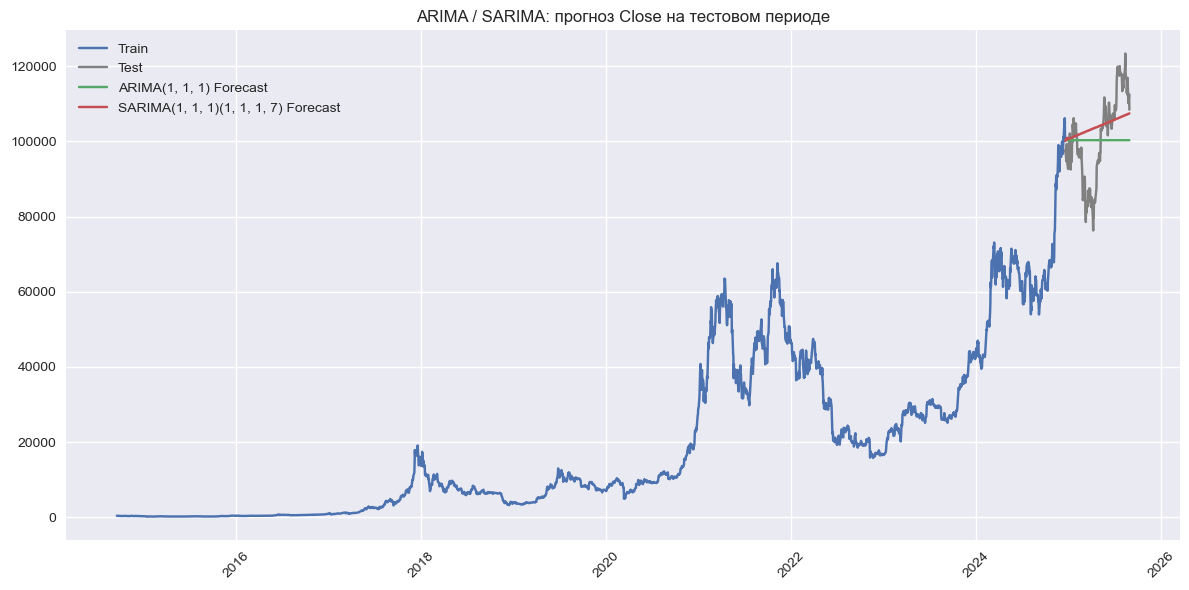

In [171]:
# === ARIMA / SARIMA на ряде Close с train/test ===


# 1) Работаем с итоговым датасетом с коррелирующими признаками
df = pd.read_csv("final_merged_correllated.csv", parse_dates=["Date"]).sort_values("Date")

# 2) Берём только ряд Close
ts = df["Close"].astype(float)
dates = df["Date"]

# 3) Делим по времени: последние 180 дней — тест
TEST_DAYS = 180
train, test = ts.iloc[:-TEST_DAYS], ts.iloc[-TEST_DAYS:]
dates_train, dates_test = dates.iloc[:-TEST_DAYS], dates.iloc[-TEST_DAYS:]

# ===== ARIMA (p,d,q) =====
arima_order = (1, 1, 1)
arima_model = SARIMAX(train, order=arima_order, seasonal_order=(0,0,0,0),
                      enforce_stationarity=False, enforce_invertibility=False)
arima_res = arima_model.fit(disp=False)

# Прогноз на длину теста
arima_pred = arima_res.get_forecast(steps=len(test)).predicted_mean

# Метрики ARIMA
arima_rmse = np.sqrt(mean_squared_error(test, arima_pred))
arima_mae  = mean_absolute_error(test, arima_pred)
arima_mape = (np.abs((test - arima_pred) / test)).mean() * 100
print(f"ARIMA{arima_order} | RMSE={arima_rmse:,.2f}  MAE={arima_mae:,.2f}  MAPE={arima_mape:,.2f}%")

# Добавляем (сохраняем) метрики качества в файл models_metrics.csv
save_metrics("ARIMA", arima_rmse, arima_mae, arima_mape)
# print ("Метрики качества сохранены в файл \"models_metrics.csv\"")

# ===== SARIMA (p,d,q)(P,D,Q,s) =====
sarima_order = (1, 1, 1)
sarima_seasonal = (1, 1, 1, 7)  # недельная сезонность для дневных данных
sarima_model = SARIMAX(train, order=sarima_order, seasonal_order=sarima_seasonal,
                       enforce_stationarity=False, enforce_invertibility=False)
sarima_res = sarima_model.fit(disp=False)

sarima_pred = sarima_res.get_forecast(steps=len(test)).predicted_mean

# Метрики SARIMA
sarima_rmse = np.sqrt(mean_squared_error(test, sarima_pred))
sarima_mae  = mean_absolute_error(test, sarima_pred)
sarima_mape = (np.abs((test - sarima_pred) / test)).mean() * 100
print(f"SARIMA{sarima_order}{sarima_seasonal} | RMSE={sarima_rmse:,.2f}  MAE={sarima_mae:,.2f}  MAPE={sarima_mape:,.2f}%")

# Добавляем (сохраняем) метрики качества в файл models_metrics.csv
save_metrics("SARIMA", sarima_rmse, sarima_mae, sarima_mape)
# print ("Метрики качества сохранены в файл \"models_metrics.csv\"")

# ===== Визуализация =====
plt.figure(figsize=(12,6))
plt.plot(dates_train, train, label="Train")
plt.plot(dates_test,  test,  label="Test", color="gray")

plt.plot(dates_test, arima_pred.values, label=f"ARIMA{arima_order} Forecast")
plt.plot(dates_test, sarima_pred.values, label=f"SARIMA{sarima_order}{sarima_seasonal} Forecast")

plt.title("ARIMA / SARIMA: прогноз Close на тестовом периоде")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Анализ полученных резульатов:**<br>
Применение ARIMA и SARIMA на временном ряде цены Bitcoin показало, что модели авторегрессии 
и скользящего среднего способны описывать общую динамику, однако их точность ограничена.  

Для ARIMA(1,1,1) средняя относительная ошибка составила 9.73%, а для SARIMA(1,1,1)(1,1,1,7) 
ошибка снизилась до 8.69% за счёт учёта недельной сезонности.  

Таким образом, SARIMA лучше адаптировалась к цикличности данных, однако обе модели оказались 
менее точными, чем методы машинного обучения (линейная регрессия, ансамблевые модели), 
что связано с высокой волатильностью и слабой повторяемостью паттернов на криптовалютном рынке.

Пример прогноза цены закрытия Bitcoin — ARIMA (последние 10 строк):


,Date,Actual_Close,Pred_Close,Error
170,2025-08-18,116252.312500,100283.368844,15968.943656
171,2025-08-19,112831.179688,100283.368844,12547.810843
172,2025-08-20,114274.742188,100283.368844,13991.373343
173,2025-08-21,112419.031250,100283.368844,12135.662406
174,2025-08-22,116874.085938,100283.368844,16590.717093
175,2025-08-25,110124.351562,100283.368844,9840.982718
176,2025-08-26,111802.656250,100283.368844,11519.287406
177,2025-08-27,111222.062500,100283.368844,10938.693656
178,2025-08-28,112544.804688,100283.368844,12261.435843
179,2025-08-29,108410.835938,100283.368844,8127.467093


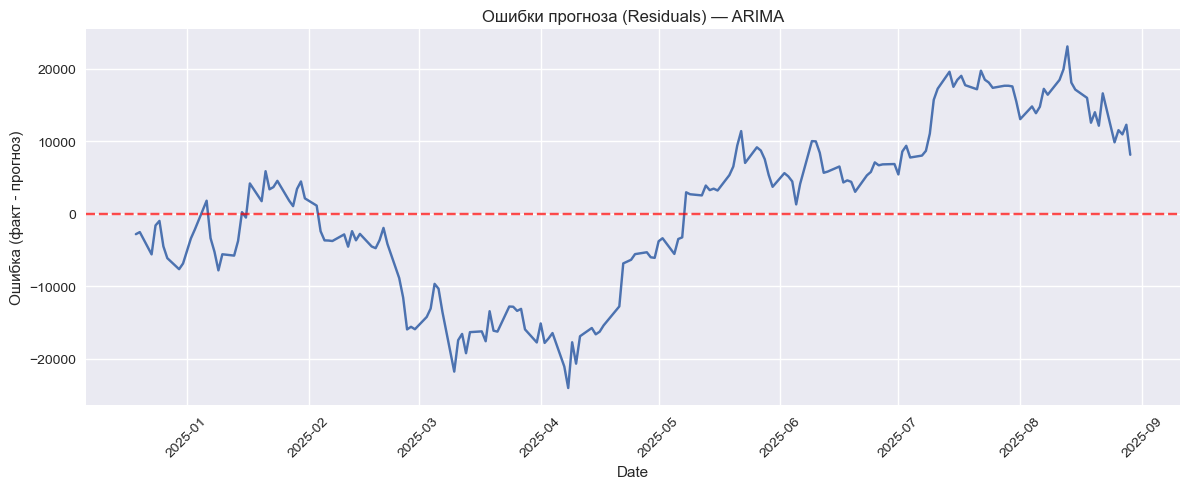

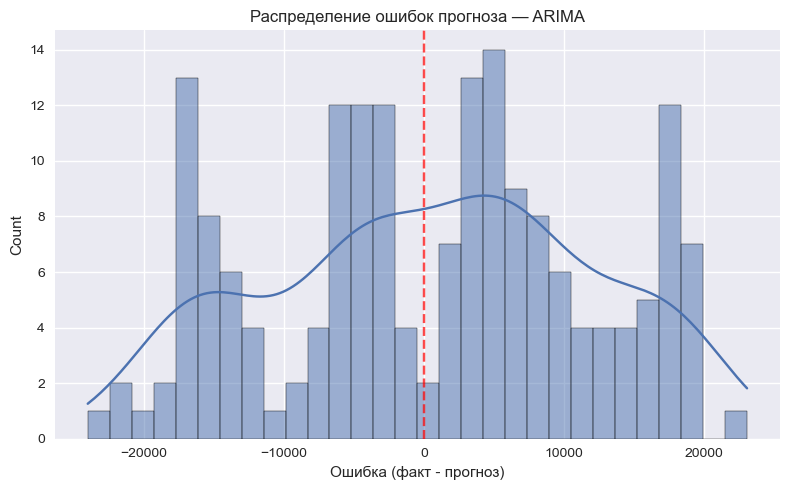

In [172]:
# === Дополнение: анализ ошибок прогноза модели ARIMA ===

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Таблица прогнозов и ошибок
results_arima = pd.DataFrame({
    "Date": pd.to_datetime(dates_test),
    "Actual_Close": np.asarray(test).reshape(-1),
    "Pred_Close":   np.asarray(arima_pred).reshape(-1),
})
results_arima["Error"] = results_arima["Actual_Close"] - results_arima["Pred_Close"]
results_arima = results_arima.reset_index(drop=True)

print("Пример прогноза цены закрытия Bitcoin — ARIMA (последние 10 строк):")
display(results_arima.tail(10))

# 2) График ошибок (Residuals)
plt.figure(figsize=(12,5))
sns.lineplot(x=results_arima["Date"], y=results_arima["Error"])
plt.axhline(0, color="red", linestyle="--", alpha=0.7)
plt.title("Ошибки прогноза (Residuals) — ARIMA")
plt.ylabel("Ошибка (факт - прогноз)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3) Гистограмма ошибок
plt.figure(figsize=(8,5))
sns.histplot(results_arima["Error"], bins=30, kde=True)
plt.axvline(0, color="red", linestyle="--", alpha=0.7)
plt.title("Распределение ошибок прогноза — ARIMA")
plt.xlabel("Ошибка (факт - прогноз)")
plt.tight_layout()
plt.show()


**Вывод:**<br>
Анализ остатков модели ARIMA показывает, что в среднем прогнозы не имеют смещения (ошибки распределены симметрично относительно нуля), однако наблюдается высокая вариативность и наличие длительных периодов с систематическим занижением или завышением прогноза. Ошибки достигают ±20 000, что указывает на неспособность модели ARIMA адекватно учитывать волатильность и быстро меняющиеся тренды криптовалютного рынка.

Пример прогноза цены закрытия Bitcoin — SARIMA (последние 10 строк):


,Date,Actual_Close,Pred_Close,Error
170,2025-08-18,116252.312500,107042.963026,9209.349474
171,2025-08-19,112831.179688,107116.271001,5714.908686
172,2025-08-20,114274.742188,107151.580906,7123.161281
173,2025-08-21,112419.031250,107169.859536,5249.171714
174,2025-08-22,116874.085938,107240.043999,9634.041938
175,2025-08-25,110124.351562,107301.206034,2823.145528
176,2025-08-26,111802.656250,107330.573591,4472.082659
177,2025-08-27,111222.062500,107321.312299,3900.750201
178,2025-08-28,112544.804688,107394.620686,5150.184001
179,2025-08-29,108410.835938,107429.930209,980.905729


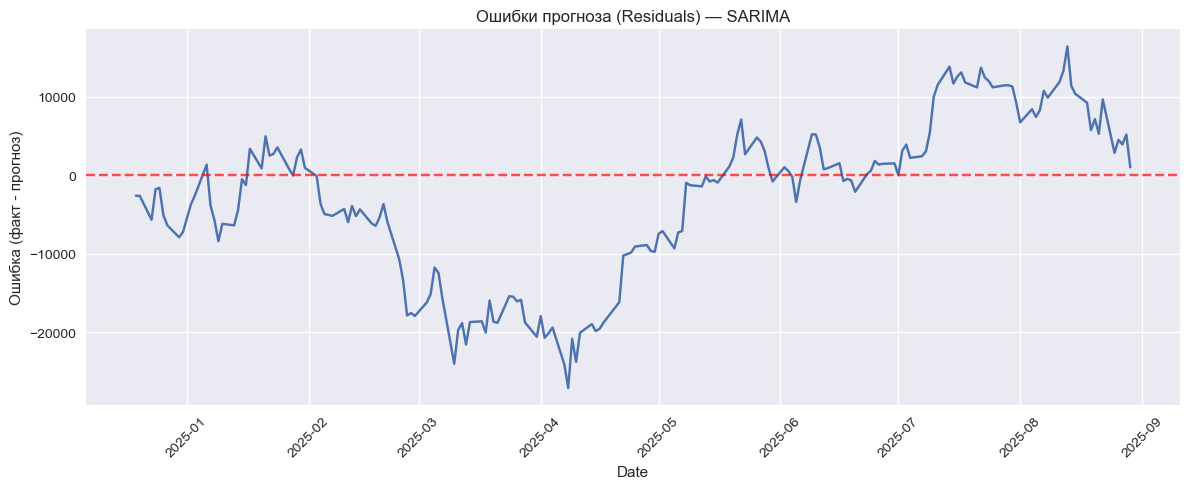

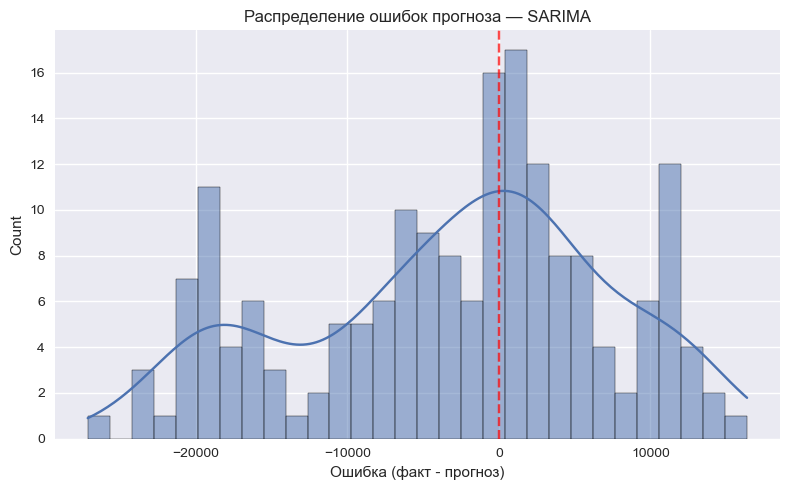

In [173]:
# === Дополнение: анализ ошибок прогноза модели SARIMA ===

results_sarima = pd.DataFrame({
    "Date": pd.to_datetime(dates_test),
    "Actual_Close": np.asarray(test).reshape(-1),
    "Pred_Close":   np.asarray(sarima_pred).reshape(-1),
})
results_sarima["Error"] = results_sarima["Actual_Close"] - results_sarima["Pred_Close"]
results_sarima = results_sarima.reset_index(drop=True)

print("Пример прогноза цены закрытия Bitcoin — SARIMA (последние 10 строк):")
display(results_sarima.tail(10))

plt.figure(figsize=(12,5))
sns.lineplot(x=results_sarima["Date"], y=results_sarima["Error"])
plt.axhline(0, color="red", linestyle="--", alpha=0.7)
plt.title("Ошибки прогноза (Residuals) — SARIMA")
plt.ylabel("Ошибка (факт - прогноз)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(results_sarima["Error"], bins=30, kde=True)
plt.axvline(0, color="red", linestyle="--", alpha=0.7)
plt.title("Распределение ошибок прогноза — SARIMA")
plt.xlabel("Ошибка (факт - прогноз)")
plt.tight_layout()
plt.show()

**Вывод:**<br>
Анализ остатков модели SARIMA показал, что в среднем прогнозы не имеют значимого смещения, однако ошибки достигают ±20 000 и демонстрируют устойчивые периоды переоценки или недооценки фактических значений. Распределение ошибок симметрично, но с тяжёлыми хвостами, что указывает на наличие значительных промахов. Таким образом, SARIMA, несмотря на учёт сезонности, остаётся недостаточно эффективной моделью для прогнозирования высоковолатильного актива, такого как Bitcoin.

---

Одним из практических ограничений моделей ARIMA и SARIMA является необходимость **ручного подбора параметров (p, d, q) и их сезонных аналогов**. Для упрощения этой задачи используется метод **AutoARIMA**, который автоматически перебирает возможные комбинации параметров и выбирает оптимальные на основе статистических критериев — **AIC (Akaike Information Criterion)** и **BIC (Bayesian Information Criterion)**.

Эти критерии оценивают баланс между точностью модели и её сложностью:
* **AIC** (критерий Акаике) минимизирует ошибку аппроксимации, позволяя подобрать модель, которая хорошо описывает данные, даже если она содержит больше параметров.
* **BIC** (байесовский информационный критерий) сильнее штрафует за избыточную сложность и предпочитает более компактные модели.

Для финансовых временных рядов (в частности, криптовалют) это имеет особое значение:
* такие ряды характеризуются высокой волатильностью и склонностью к переобучению;
* AIC и BIC позволяют находить баланс между адаптацией к данным и устойчивостью модели на будущих периодах;
* это снижает риск того, что выбранная модель будет хорошо описывать исторические данные, но плохо предсказывать новые значения.

В контексте текущего проекта AutoARIMA позволяет:
* ускорить процесс моделирования, исключив ручной подбор параметров;
* повысить объективность выбора модели за счёт минимизации AIC и BIC;
* создать базовую «опорную модель», с которой можно сравнивать результаты более сложных алгоритмов.

Таким образом, AutoARIMA выступает инструментом, который сочетает автоматизацию, интерпретируемость и статистическую строгость — качества, особенно востребованные при прогнозировании финансовых рядов.

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=45203.382, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=45190.435, Time=1.64 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=45189.211, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=45204.287, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=45200.265, Time=0.22 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=45187.983, Time=1.38 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=45190.588, Time=1.23 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=45186.877, Time=5.49 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=45184.993, Time=0.68 sec
 ARIMA(0,1,0)(2,0,0)[7] intercept   : AIC=45188.710, Time=0.59 sec
 ARIMA(1,1,1)(2,0,0)[7] intercept   : AIC=45186.799, Time=2.24 sec
 ARIMA(0,1,2)(2,0,0)[7] intercept   : AIC=45186.459, Time=0.73 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=45184.827, Time=0.77 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=45186.729, Time=2.11 sec
 ARIMA(1,1,0)(1,0,1

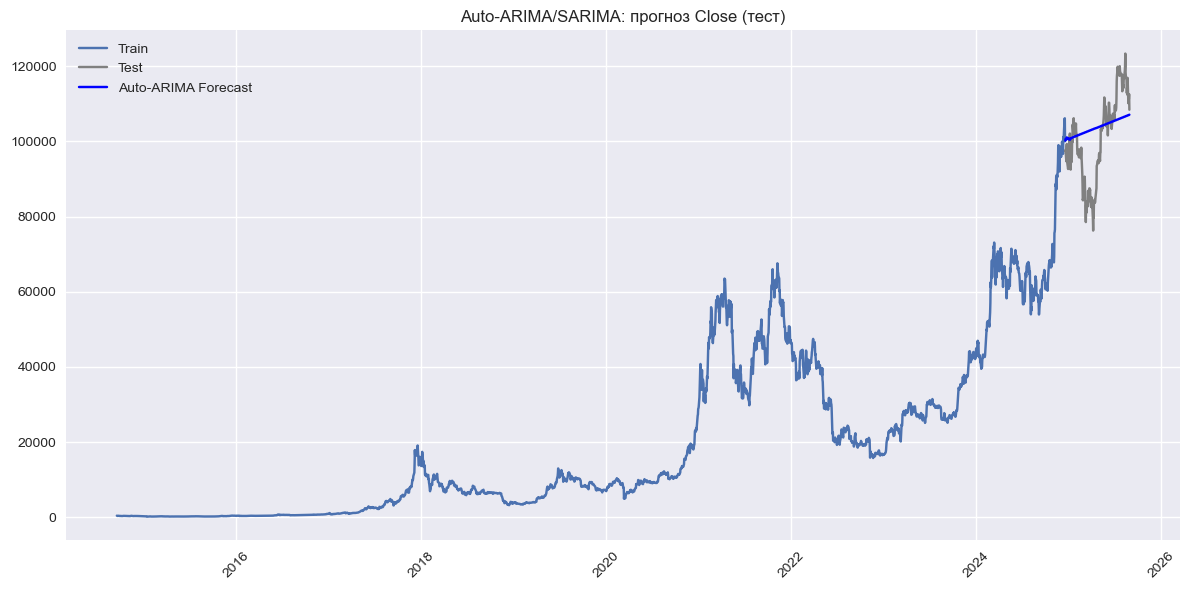

In [174]:
# === Подбор параметров ARIMA/SARIMA через auto_arima ===

from pmdarima import auto_arima

# 1) Работаем с итоговым датасетом с коррелирующими признаками
#df = pd.read_csv("final_merged_correllated.csv", parse_dates=["Date"]).sort_values("Date")

# 2) Берём временной ряд
ts = df["Close"].astype(float)

# 3) Делим на train/test (последние 180 дней — тест)
TEST_DAYS = 180
train, test = ts.iloc[:-TEST_DAYS], ts.iloc[-TEST_DAYS:]
dates_train, dates_test = df["Date"].iloc[:-TEST_DAYS], df["Date"].iloc[-TEST_DAYS:]

# 4) Автоматический подбор параметров (учитываем недельную сезонность s=7)
auto_model = auto_arima(
    train,
    start_p=0, start_q=0,
    max_p=3, max_q=3,
    start_P=0, start_Q=0,
    max_P=2, max_Q=2,
    d=None, D=None,           # auto_arima определит порядок дифференцирования сама
    seasonal=True,            # включаем SARIMA
    m=7,                      # длина сезона (7 дней)
    stepwise=True,            # пошаговый перебор (быстрее полного)
    suppress_warnings=True,
    error_action="ignore",
    trace=True                # печатает процесс подбора
)

print("Оптимальная модель:", auto_model.summary())

# 5) Прогноз на тест
forecast = auto_model.predict(n_periods=len(test))

# 6) Метрики
from sklearn.metrics import mean_squared_error, mean_absolute_error

automodel_rmse = np.sqrt(mean_squared_error(test, forecast))
automodel_mae  = mean_absolute_error(test, forecast)
automodel_mape = (np.abs((test - forecast) / test)).mean() * 100

print(f"Auto-ARIMA/SARIMA | RMSE={automodel_rmse:,.2f}  MAE={automodel_mae:,.2f}  MAPE={automodel_mape:,.2f}%")

# Добавляем (сохраняем) метрики качества в файл models_metrics.csv
save_metrics("Auto-ARIMA/SARIMA", automodel_rmse, automodel_mae, automodel_mape)
# print ("Метрики качества сохранены в файл \"models_metrics.csv\"")

# 7) Визуализация
plt.figure(figsize=(12,6))
plt.plot(dates_train, train, label="Train")
plt.plot(dates_test, test, label="Test", color="gray")
plt.plot(dates_test, forecast, label="Auto-ARIMA Forecast", color="blue")
plt.title("Auto-ARIMA/SARIMA: прогноз Close (тест)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Анализ полученных результатов:**<br>
С помощью автоматического подбора параметров (функция auto_arima из библиотеки pmdarima) была определена оптимальная модель SARIMA(1,1,0)(2,0,0,7):
* (1,1,0) — несезонная часть модели:
- 1 — число авторегрессионных лагов (AR),
- 1 — порядок дифференцирования (I),
- 0 — число лагов скользящего среднего (MA).
* (2,0,0,7) — сезонная часть модели:
- 2 — число сезонных авторегрессионных лагов (SAR),
- 0 — порядок сезонного дифференцирования,
- 0 — число сезонных лагов скользящего среднего (SMA),
- 7 — длина сезонности (в нашем случае — неделя, так как данные дневные).

Таким образом, эта модель учитывает как краткосрочные зависимости и тренд, так и повторяющуюся недельную сезонность в данных.

Прогноз на тестовом периоде (180 дней) показал следующие метрики: RMSE = \\$10 539.07, MAE = \\$8 213.40, MAPE = 8.71%.

Таким образом, автоматический подбор подтвердил наличие недельной сезонности в данных и позволил улучшить качество прогноза по сравнению с классической ARIMA без сезонности. Однако даже оптимальная SARIMA-модель показывает худшую точность, чем методы машинного обучения, что связано с высокой волатильностью криптовалютного рынка и ограниченными возможностями линейных временных моделей.

Пример прогноза цены закрытия Bitcoin — Auto-ARIMA (последние 10 строк):


,Date,Actual_Close,Pred_Close,Error
170,2025-08-18,116252.312500,106746.754896,9505.557604
171,2025-08-19,112831.179688,106784.624297,6046.555390
172,2025-08-20,114274.742188,106822.493699,7452.248489
173,2025-08-21,112419.031250,106860.363100,5558.668150
174,2025-08-22,116874.085938,106898.232502,9975.853436
175,2025-08-25,110124.351562,106936.101903,3188.249659
176,2025-08-26,111802.656250,106973.971305,4828.684945
177,2025-08-27,111222.062500,107011.840706,4210.221794
178,2025-08-28,112544.804688,107049.710108,5495.094580
179,2025-08-29,108410.835938,107087.579509,1323.256428


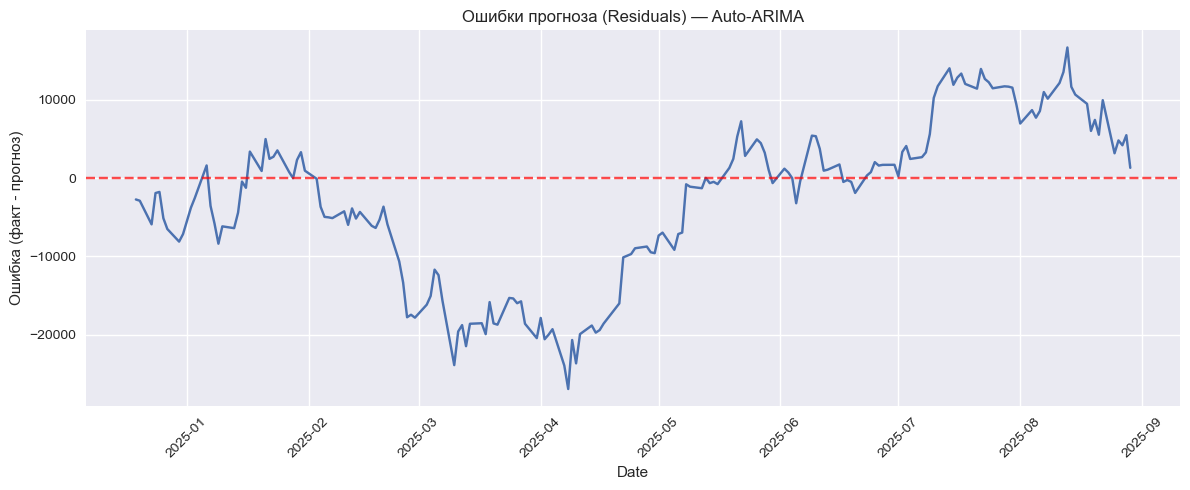

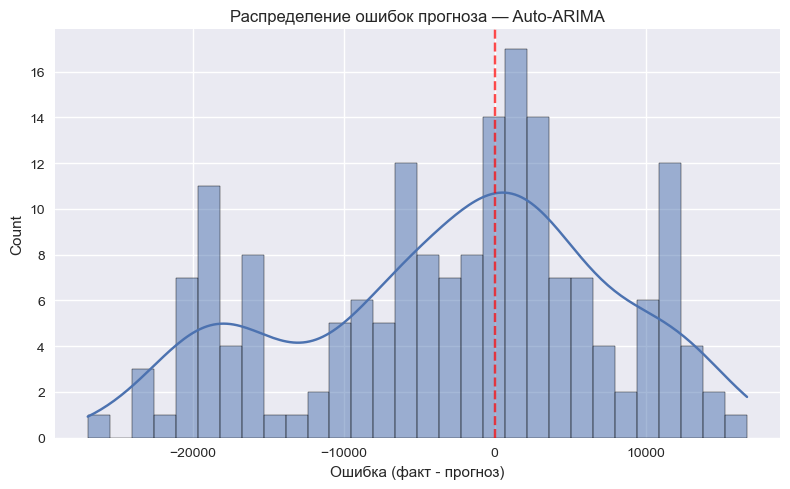

In [175]:
# === Дополнение: анализ ошибок прогноза модели Auto-ARIMA/SARIMA ===

results_auto = pd.DataFrame({
    "Date": pd.to_datetime(dates_test),
    "Actual_Close": np.asarray(test).reshape(-1),
    "Pred_Close":   np.asarray(forecast).reshape(-1),
})
results_auto["Error"] = results_auto["Actual_Close"] - results_auto["Pred_Close"]
results_auto = results_auto.reset_index(drop=True)

print("Пример прогноза цены закрытия Bitcoin — Auto-ARIMA (последние 10 строк):")
display(results_auto.tail(10))

plt.figure(figsize=(12,5))
sns.lineplot(x=results_auto["Date"], y=results_auto["Error"])
plt.axhline(0, color="red", linestyle="--", alpha=0.7)
plt.title("Ошибки прогноза (Residuals) — Auto-ARIMA")
plt.ylabel("Ошибка (факт - прогноз)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(results_auto["Error"], bins=30, kde=True)
plt.axvline(0, color="red", linestyle="--", alpha=0.7)
plt.title("Распределение ошибок прогноза — Auto-ARIMA")
plt.xlabel("Ошибка (факт - прогноз)")
plt.tight_layout()
plt.show()


**Вывод:**<br>
Анализ ошибок модели Auto-ARIMA показал, что, несмотря на автоматизированный подбор параметров, качество прогноза остаётся ограниченным: ошибки достигают ±20 000, а остатки демонстрируют устойчивые периоды как переоценки, так и недооценки фактической цены. Распределение ошибок близко к симметричному, но имеет тяжёлые хвосты и мультимодальную структуру, что отражает неспособность модели адекватно описывать волатильность Bitcoin. Таким образом, Auto-ARIMA, как и другие классические статистические модели, оказывается недостаточно точной для прогноза криптовалютных рядов.

---

В данном проекте данные модели были рассмотрены как возможный инструмент прогнозирования. Однако для криптовалютного рынка характерны высокая волатильность и слабая выраженность сезонности, поэтому применение ARIMA и SARIMA не даёт значимого преимущества в точности прогноза.  
В связи с этим основной акцент в работе сделан на современных моделях машинного обучения и нейросетевых подходах (линейная регрессия, Random Forest, XGBoost, LSTM), которые лучше справляются с нелинейными зависимостями и динамическими особенностями цен криптовалют.

#### Сравнение подходов к прогнозированию

| Подход | Преимущества | Ограничения | Применимость к криптовалютам |
|--------|--------------|-------------|------------------------------|
| **ARIMA** | Простая реализация; понятные параметры (p,d,q); доверительные интервалы прогноза | Требует стационарности; плохо работает при высокой волатильности; не учитывает внешние факторы | Даёт базовый ориентир (benchmark), но слабо описывает резкие колебания |
| **SARIMA** | Учитывает сезонность; расширяет возможности ARIMA | Сложнее настройка; подходит только при выраженных сезонных паттернах | Сезонность у криптовалют выражена слабо → модель не даёт значимого улучшения |
| **ML (Linear Regression, Random Forest, XGBoost)** | Улавливают нелинейные зависимости; можно включать внешние признаки (Gold, SMA, Volume); выше точность прогноза | Требуют подготовки признаков (лаги, индикаторы); меньше интерпретируемости, чем ARIMA | Хорошо подходят для краткосрочного прогноза и анализа влияния факторов |
| **DL (LSTM)** | Учитывает долгосрочные зависимости; гибко адаптируется к сложным паттернам | Требует больших данных и ресурсов; «чёрный ящик» | Может уловить скрытые режимы рынка и улучшить качество прогноза |

---

## 6. Формирование выборки

In [176]:
# 1) копирование итогового датасета с коррелирующими признаками (Date переносим из индекса в отдельный столбец)
df = df_input.copy().reset_index()

# 2) Признаки на момент t 
feature_cols = ["Close", "Gold","INR", "SMA_200", "Volume", "ATR_14"]
X_all = df[feature_cols].copy()

# 3) Таргет = Close_{t+1}, а также даты прогноза (t+1)
y_all = df["Close"].shift(-1)                     # прогноз на 1 день вперёд
pred_dates = df["Date"] + pd.Timedelta(days=1)    # дата прогноза

# 4) Чистка пропусков
data = pd.concat([X_all, y_all.rename("y"), pred_dates.rename("PredDate")], axis=1).dropna()
X, y = data[feature_cols], data["y"]
pred_dates_clean = data["PredDate"]

# 5) Сплит по времени (train = всё до последних 180 дней, test = последние 180)
TEST_DAYS = 180
split = len(X) - TEST_DAYS
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]
dates_test = pred_dates_clean.iloc[split:]

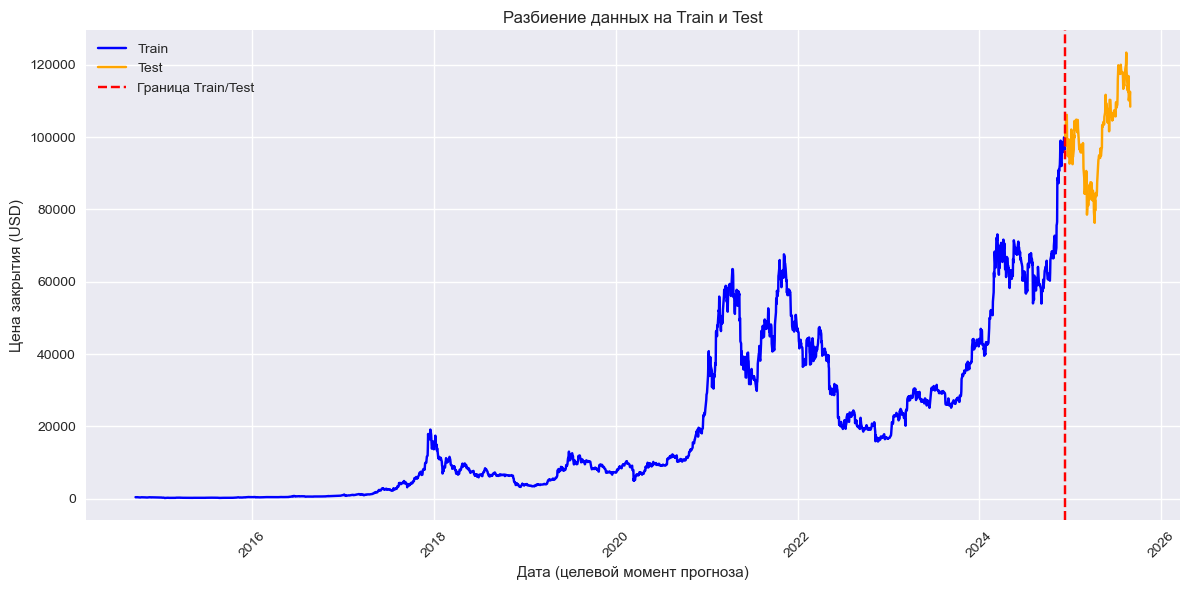

In [177]:
# ===== Визуализация Train/Test разбиения =====

# даты, выровненные с y (после dropna)
dates_all = pred_dates_clean  # из data["PredDate"] выше

# train/test разбиение по тем же индексам
plt.figure(figsize=(12,6))
plt.plot(dates_all.iloc[:split], y.iloc[:split], label="Train", color="blue")
plt.plot(dates_all.iloc[split:], y.iloc[split:], label="Test", color="orange")

# линия границы
plt.axvline(dates_all.iloc[split], color="red", linestyle="--", label="Граница Train/Test")

plt.title("Разбиение данных на Train и Test")
plt.xlabel("Дата (целевой момент прогноза)")
plt.ylabel("Цена закрытия (USD)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## 7. Модели машинного обучения: обучение и оценка моделей, прогнозы и визуализация

### 7.1. Линейная регрессия

**Линейная регрессия** — это базовый метод машинного обучения, который моделирует зависимость целевой переменной от набора факторов (признаков) с помощью линейной комбинации. Модель имеет вид:

$$
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n
$$

где $\hat{y}$ — прогнозируемое значение, $x_i$ — признаки, $\beta_i$ — коэффициенты модели.

**Для чего используется:**  
- даёт простой и интерпретируемый способ оценить, как признаки влияют на целевую переменную;  
- служит отправной точкой (benchmark) для сравнения с более сложными моделями.

**Применение в проекте:**  
В данном исследовании линейная регрессия используется для прогнозирования цены закрытия Bitcoin на следующий день. В качестве признаков применяются: лаги самой цены, скользящая средняя (SMA_200), цена золота (Gold), объём торгов (Volume) и индикатор волатильности (ATR_14). Такой набор позволяет проверить, насколько простая линейная комбинация технических индикаторов и макрофакторов может объяснить динамику курса криптовалюты.

**Метрики качества:**  
Для оценки точности прогноза используются стандартные метрики регрессии:  
- **MAE (Mean Absolute Error)** — средняя абсолютная ошибка;  
- **RMSE (Root Mean Squared Error)** — среднеквадратичная ошибка, чувствительна к выбросам;  
- **MAPE (Mean Absolute Percentage Error)** — средняя относительная ошибка в процентах.  

**Выводы по итогам применения:**  
- линейная регрессия покажет, в какой степени цена Bitcoin зависит от выбранных факторов в линейной форме;  
- коэффициенты модели позволят оценить направление и силу влияния признаков (например, рост золота → рост BTC);  
- результаты регрессии станут отправной точкой для сравнения с нелинейными моделями (Random Forest, XGBoost) и нейросетями (LSTM).  

In [178]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. Работаем с итоговым датасетом с коррелирующими признаками
display(df_input)
df_input.info()

,Close,Volume,SMA_50,SMA_200,ATR_14,Gold,INR
Date,,,,,,,
2014-09-17,457.334015,21056800,457.334015,457.334015,15.752014,1234.400024,61.053001
2014-09-18,424.440002,34483200,440.887009,440.887009,29.991013,1225.699951,60.908001
2014-09-19,394.795990,37919700,425.523336,425.523336,34.428335,1215.300049,60.689999
2014-09-22,402.152008,24127600,414.407837,414.407837,27.621496,1216.800049,60.853001
2014-09-23,435.790985,45099500,417.462572,417.462572,30.155570,1221.000000,61.000000
...,...,...,...,...,...,...,...
2025-08-25,110124.351562,85706860190,116508.301719,100854.757305,3395.174665,3373.800049,87.330101
2025-08-26,111802.656250,69396320317,116578.357813,100931.125156,3506.690848,3388.600098,87.608597
2025-08-27,111222.062500,62137056409,116623.793594,101004.823203,3326.571429,3404.600098,87.600700


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2856 entries, 2014-09-17 to 2025-08-29
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Close    2856 non-null   float64
 1   Volume   2856 non-null   int64  
 2   SMA_50   2856 non-null   float64
 3   SMA_200  2856 non-null   float64
 4   ATR_14   2856 non-null   float64
 5   Gold     2754 non-null   float64
 6   INR      2852 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 178.5 KB


Linear Regression | RMSE=2,445.73  MAE=1,867.67  MAPE=1.90%
Метрики сохранены для LinearRegression → models_metrics.csv

Коэффициенты модели (по модулю):
 Close      21264.435351
Gold         141.615939
Volume        58.240902
INR          -30.481691
SMA_200      -27.838745
ATR_14        -0.697918
dtype: float64


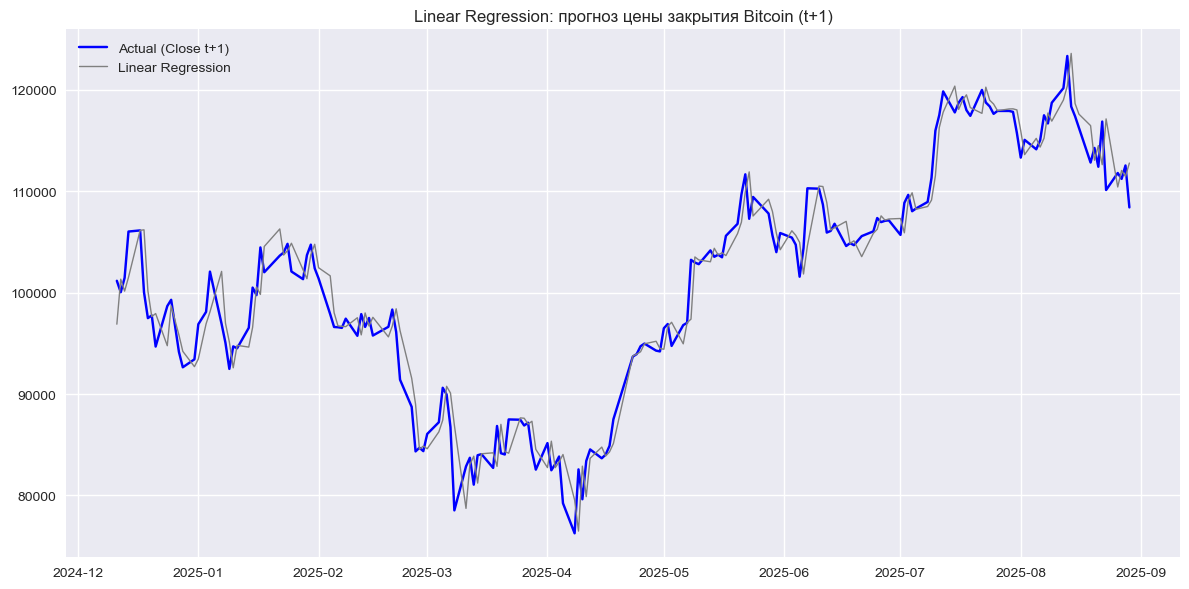

In [179]:
# === Линейная регрессия для прогноза цены BTC === 

# пункты 1-5 - в разделе 6. Формирование выборки

# 6) Модель: стандартизация + линейная регрессия
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("linreg", LinearRegression())
])
pipe.fit(X_train, y_train)

# 7) Прогноз и метрики
y_pred_ln = pipe.predict(X_test)
rmse_ln = np.sqrt(mean_squared_error(y_test, y_pred_ln))
mae_ln  = mean_absolute_error(y_test, y_pred_ln)
mape_ln = (np.abs((y_test - y_pred_ln) / y_test)).mean() * 100

print(f"Linear Regression | RMSE={rmse_ln:,.2f}  MAE={mae_ln:,.2f}  MAPE={mape_ln:,.2f}%")

# Добавляем (сохраняем) метрики качества в файл models_metrics.csv
save_metrics("LinearRegression", rmse_ln, mae_ln, mape_ln)
# print ("Метрики качества сохранены в файл \"models_metrics.csv\"")

# 8) Коэффициенты (вклад признаков)
coef_ln = pd.Series(pipe.named_steps["linreg"].coef_, index=feature_cols).sort_values(key=np.abs, ascending=False)
print("\nКоэффициенты модели (по модулю):\n", coef_ln)

# 9) Визуализация: факт vs прогноз (для t+1)
plt.figure(figsize=(12,6))
plt.plot(dates_test, y_test.values, label="Actual (Close t+1)", color="blue")
plt.plot(dates_test, y_pred_ln, label="Linear Regression", linewidth=1, color="grey")
plt.title("Linear Regression: прогноз цены закрытия Bitcoin (t+1)")
plt.legend()
plt.tight_layout()
plt.show()

**Анализ полученных результатов (модель Линейная регрессия):**<br>
Применение линейной регрессии показало высокое качество прогноза: <br>
средняя относительная ошибка составила 1.90% (MAPE), средняя абсолютная ошибка — \\$1 867.67 (MAE), 
а среднеквадратичная ошибка — \\$2 445.73 (RMSE). Это означает, что модель в среднем ошибалась менее чем на 2% 
при прогнозе цены закрытия Bitcoin на следующий день.  

Анализ коэффициентов показал, что ключевым фактором является текущая цена закрытия Bitcoin, 
которая вносит основной вклад в прогноз. Дополнительные признаки — цена золота, объём торгов, цена индийской рупии, SMA_200 и ATR_14 — 
оказывают сравнительно небольшое влияние.  

Таким образом, линейная регрессия демонстрирует высокую точность и хорошую интерпретируемость, 
что делает её надёжной базовой моделью для последующего сравнения с более сложными методами машинного обучения 
и нейросетевыми подходами.

Пример прогноза цены закрытия Bitcoin модели Линейная регрессия (последние 10 строк):


,Date,Actual_Close_t+1,Pred_Close_t+1,Error
170,2025-08-16,116252.312500,117607.426626,-1355.114126
171,2025-08-19,112831.179688,116476.298952,-3645.119265
172,2025-08-20,114274.742188,113060.507869,1214.234319
173,2025-08-21,112419.031250,114499.984184,-2080.952934
174,2025-08-22,116874.085938,112622.315434,4251.770503
175,2025-08-23,110124.351562,117137.816461,-7013.464898
176,2025-08-26,111802.656250,110424.046607,1378.609643
177,2025-08-27,111222.062500,112055.243324,-833.180824
178,2025-08-28,112544.804688,111463.359399,1081.445289
179,2025-08-29,108410.835938,112781.527708,-4370.691771


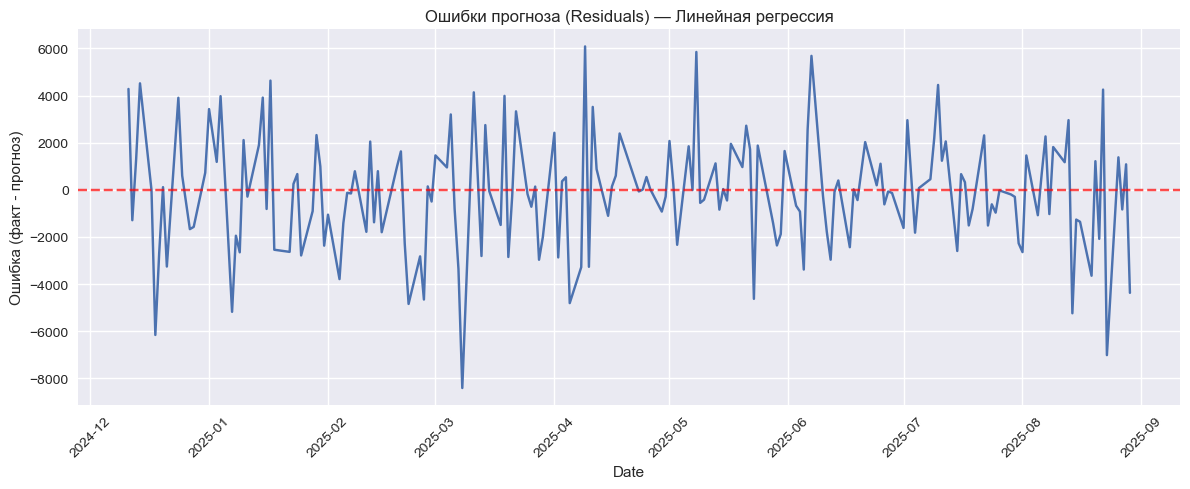

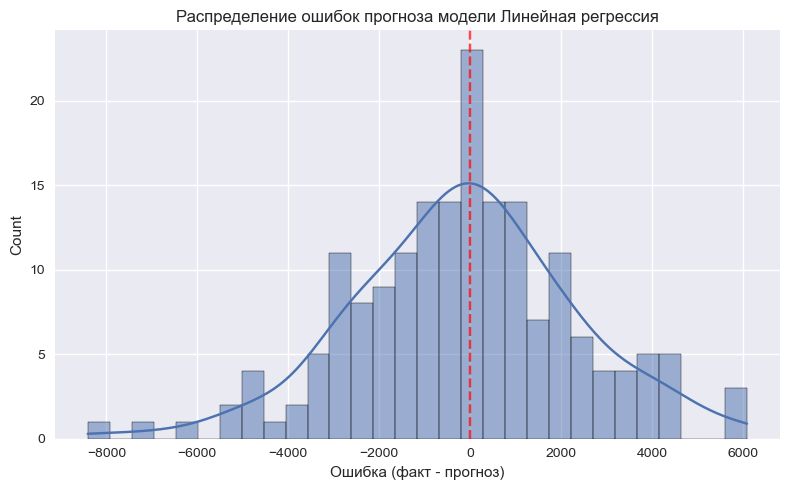

In [180]:
# === Дополнение: анализ ошибок прогноза Линейной регрессии ===

import seaborn as sns

# 1) Таблица с последними 10 строками прогноза
results_ln = pd.DataFrame({
    "Date": dates_test,
    "Actual_Close_t+1": y_test.values,
    "Pred_Close_t+1": y_pred_ln,
    "Error": y_test.values - y_pred_ln
}).reset_index(drop=True)             # сбрасываем индекс, Date остаётся столбцом

print("Пример прогноза цены закрытия Bitcoin модели Линейная регрессия (последние 10 строк):")
display(results_ln.tail(10))

# 2) График ошибок (residuals)
plt.figure(figsize=(12,5))
sns.lineplot(x=results_ln["Date"], y=results_ln["Error"])
plt.axhline(0, color="red", linestyle="--", alpha=0.7)
plt.title("Ошибки прогноза (Residuals) — Линейная регрессия")
plt.ylabel("Ошибка (факт - прогноз)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3) Гистограмма ошибок
plt.figure(figsize=(8,5))
sns.histplot(results_ln["Error"], bins=30, kde=True)
plt.axvline(0, color="red", linestyle="--", alpha=0.7)
plt.title("Распределение ошибок прогноза модели Линейная регрессия")
plt.xlabel("Ошибка (факт - прогноз)")
plt.tight_layout()
plt.show()

**Вывод**:<br>
Анализ остатков линейной регрессии показывает, что модель в среднем не имеет смещения и ошибки распределены близко к нормальному закону. Однако высокое значение разброса и наличие выбросов указывают на ограниченность линейной регрессии при прогнозировании волатильного актива, такого как Bitcoin.

---

### 7.2. Random Forest

**Random Forest** — это ансамблевый метод машинного обучения, основанный на построении множества решающих деревьев.  
Каждое дерево обучается на случайной подвыборке данных и подмножестве признаков, а итоговый прогноз формируется как усреднение прогнозов всех деревьев (для задачи регрессии).  

**Преимущества метода:**
- способен улавливать **нелинейные зависимости** между признаками и целевой переменной;  
- устойчив к выбросам и шуму в данных;  
- не требует строгой подготовки данных (масштабирования, приведения к стационарности).  

**Применение в проекте:**  
В рамках данного исследования Random Forest используется для прогнозирования цены закрытия Bitcoin на следующий день.  
В качестве признаков применяются лаги самой цены (`Close`), технические индикаторы (`SMA_200`, `ATR_14`), объём торгов (`Volume`) и макроэкономический фактор — цена золота (`Gold`).  
Это позволяет проверить, насколько нелинейный ансамблевый метод может улучшить результаты по сравнению с линейной регрессией.  

**Метрики качества:**  
Точность модели оценивается с помощью:  
- **MAE (Mean Absolute Error)** — средняя абсолютная ошибка;  
- **RMSE (Root Mean Squared Error)** — среднеквадратичная ошибка;  
- **MAPE (Mean Absolute Percentage Error)** — средняя относительная ошибка в процентах.  

**Ожидаемые выводы:**  
- Random Forest должен показать более низкие ошибки прогноза по сравнению с линейной регрессией за счёт учёта нелинейностей.  
- Важность признаков, вычисленная моделью, позволит выявить, какие факторы оказывают наибольшее влияние на цену Bitcoin.  
- Итоги применения модели помогут оценить, насколько добавление ансамблевых методов повышает точность прогнозирования криптовалютных временных рядов.

Random Forest | RMSE=11,354.30  MAE=9,458.95  MAPE=9.18%
Метрики сохранены для Random Forest → models_metrics.csv

Важность признаков:
 Close      0.989197
INR        0.007986
SMA_200    0.001614
Gold       0.000438
ATR_14     0.000390
Volume     0.000376
dtype: float64


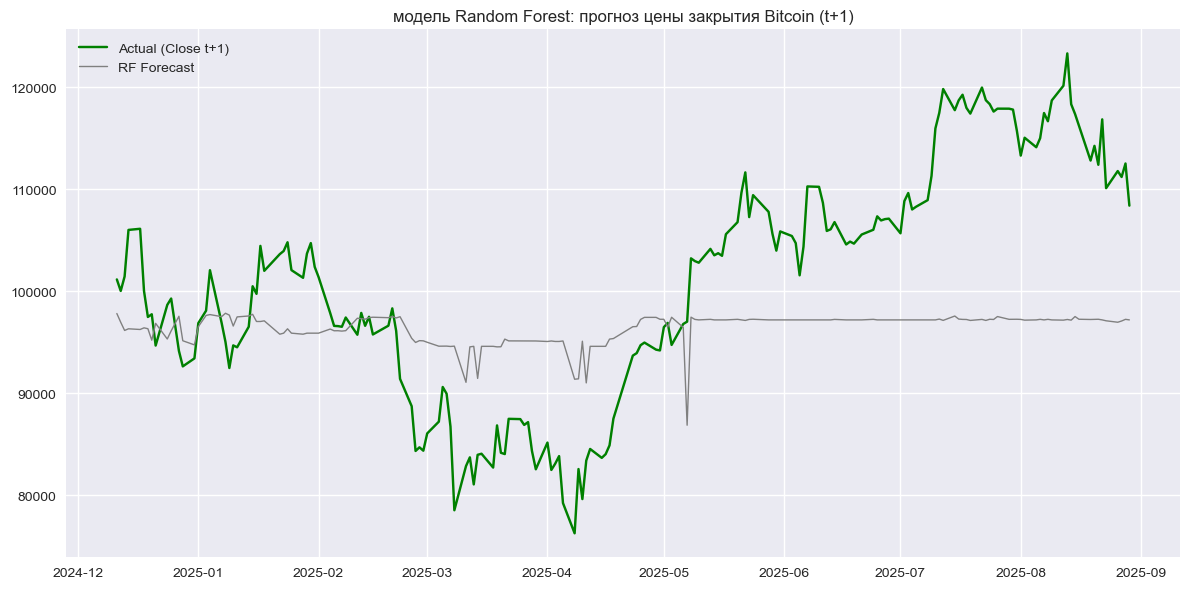

In [181]:
# === Random Forest для прогноза цены BTC ===

from sklearn.ensemble import RandomForestRegressor

# пункты 1-5 - в разделе формирование выборки

# 6) Обучение Random Forest (простые настройки)
rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# 7) Прогноз и метрики
y_pred_rf = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf  = mean_absolute_error(y_test, y_pred_rf)
mape_rf = (np.abs((y_test - y_pred_rf) / y_test)).mean() * 100

print(f"Random Forest | RMSE={rmse_rf:,.2f}  MAE={mae_rf:,.2f}  MAPE={mape_rf:,.2f}%")

# Добавляем (сохраняем) метрики качества в файл models_metrics.csv
save_metrics("Random Forest", rmse_rf, mae_rf, mape_rf)
# print ("Метрики качества сохранены в файл \"models_metrics.csv\"")

# 8) Важность признаков
importances = pd.Series(rf.feature_importances_, index=feature_cols).sort_values(ascending=False)
print("\nВажность признаков:\n", importances)

# 9) График: факт vs прогноз (t+1)
plt.figure(figsize=(12,6))
plt.plot(dates_test, y_test.values, label="Actual (Close t+1)", color="green")
plt.plot(dates_test, y_pred_rf, label="RF Forecast", linewidth=1, color="grey")
plt.title("модель Random Forest: прогноз цены закрытия Bitcoin (t+1)")
plt.legend()
plt.tight_layout()
plt.show()

**Анализ полученных результатов (модель Random Forest):**<br>
Применение модели Random Forest без лагов показало среднюю относительную ошибку 9.18% (MAPE), 
что значительно выше, чем у линейной регрессии. Средняя абсолютная ошибка составила \\$9 458.95, 
а среднеквадратичная ошибка — \\$11 354.30.  

Анализ важности признаков показал, что практически вся предсказательная сила модели приходится 
на текущую цену закрытия Bitcoin, в то время как остальные факторы (SMA_200, цена золота, индийской рупии, объём торгов, ATR_14) 
оказались малозначимыми.  

Таким образом, в условиях прогноза на один день вперёд Random Forest не смог показать преимущества 
и уступил по точности более простой линейной модели.

Пример прогноза цены закрытия Bitcoin модели Random Forest (последние 10 строк):


,Date,Actual_Close_t+1,Pred_Close_t+1,Error
170,2025-08-16,116252.312500,97266.371979,18985.940521
171,2025-08-19,112831.179688,97244.622370,15586.557318
172,2025-08-20,114274.742188,97251.872240,17022.869948
173,2025-08-21,112419.031250,97266.371979,15152.659271
174,2025-08-22,116874.085938,97202.965755,19671.120182
175,2025-08-23,110124.351562,97115.744922,13008.606641
176,2025-08-26,111802.656250,96973.368646,14829.287604
177,2025-08-27,111222.062500,97095.498854,14126.563646
178,2025-08-28,112544.804688,97259.069714,15285.734974
179,2025-08-29,108410.835938,97202.965755,11207.870182


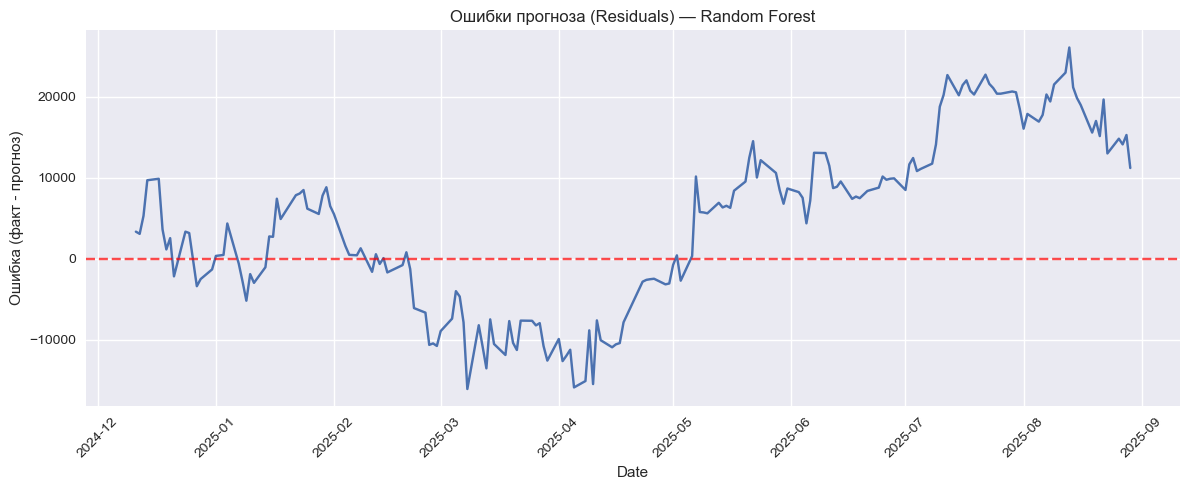

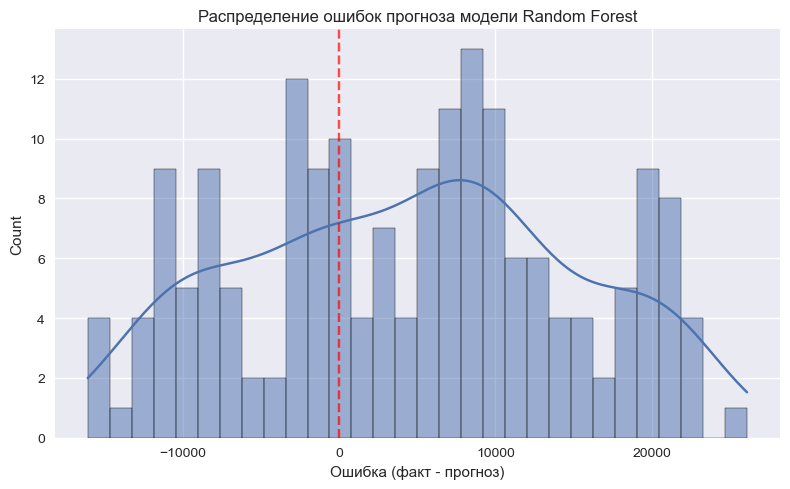

In [182]:
# === Дополнение: анализ ошибок прогноза модели Random Forest ===

# 1) Таблица с последними 10 строками прогноза
results_rf = pd.DataFrame({
    "Date": dates_test,
    "Actual_Close_t+1": y_test.values,
    "Pred_Close_t+1": y_pred_rf,
    "Error": y_test.values - y_pred_rf
}).reset_index(drop=True)             # сбрасываем индекс, Date остаётся столбцом

print("Пример прогноза цены закрытия Bitcoin модели Random Forest (последние 10 строк):")
display(results_rf.tail(10))

# 2) График ошибок (residuals)
plt.figure(figsize=(12,5))
sns.lineplot(x=results_rf["Date"], y=results_rf["Error"])
plt.axhline(0, color="red", linestyle="--", alpha=0.7)
plt.title("Ошибки прогноза (Residuals) — Random Forest")
plt.ylabel("Ошибка (факт - прогноз)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3) Гистограмма ошибок
plt.figure(figsize=(8,5))
sns.histplot(results_rf["Error"], bins=30, kde=True)
plt.axvline(0, color="red", linestyle="--", alpha=0.7)
plt.title("Распределение ошибок прогноза модели Random Forest")
plt.xlabel("Ошибка (факт - прогноз)")
plt.tight_layout()

**Вывод:**<br>
Анализ ошибок Random Forest показывает систематическое смещение: начиная с весны 2025 года модель стабильно недооценивает цену Bitcoin на величину до 20 000. Распределение ошибок смещено вправо, что свидетельствует о неспособности модели улавливать восходящий тренд. Таким образом, Random Forest оказывается менее подходящей моделью для прогнозирования криптовалютного ряда, так как не учитывает динамику долгосрочных изменений.

---

### 7.3. XGBoost

**XGBoost (Extreme Gradient Boosting)** — это одна из самых популярных реализаций градиентного бустинга, основанного на ансамбле деревьев решений.  
Модель строит последовательность деревьев, где каждое следующее дерево исправляет ошибки предыдущих. В результате формируется сильный предсказатель, который хорошо улавливает сложные зависимости в данных.

**Преимущества XGBoost:**
- высокая точность за счёт учёта нелинейных связей и взаимодействий признаков;  
- встроенная регуляризация, которая предотвращает переобучение;  
- возможность оценивать важность признаков (Feature Importance, SHAP-анализ).  

**Применение в проекте:**  
XGBoost используется для прогнозирования цены закрытия Bitcoin на следующий день.
Признаки: лаги цены (`Close`), скользящая средняя (`SMA_200`), объём торгов (`Volume`), волатильность (`ATR_14`), цена золота (`Gold`) и курс индийской рупии (`INR`).
Такой набор факторов позволяет учитывать как внутренние характеристики криптовалютного рынка, так и влияние внешних макроэкономических индикаторов. Это даёт возможность оценить, насколько мощный бустинговый алгоритм может улучшить точность прогноза по сравнению с линейной регрессией и Random Forest.

**Метрики качества:**  
- RMSE (Root Mean Squared Error)  
- MAE (Mean Absolute Error)  
- MAPE (Mean Absolute Percentage Error)

**Ожидаемые выводы:**  
XGBoost должен показывать более низкие ошибки, чем Random Forest, и лучше учитывать нелинейные зависимости.  
Даже если точность окажется сравнимой с линейной регрессией, XGBoost ценен тем, что позволяет провести интерпретацию признаков (например, через SHAP-анализ) и выявить скрытые закономерности.

XGBoost | RMSE=11,780.89  MAE=9,637.86  MAPE=9.23%
Best iteration: 414
Метрики сохранены для XGBoost → models_metrics.csv

Важность признаков:
 Close      0.763894
SMA_200    0.160060
ATR_14     0.034299
Gold       0.022491
INR        0.018273
Volume     0.000983
dtype: float32


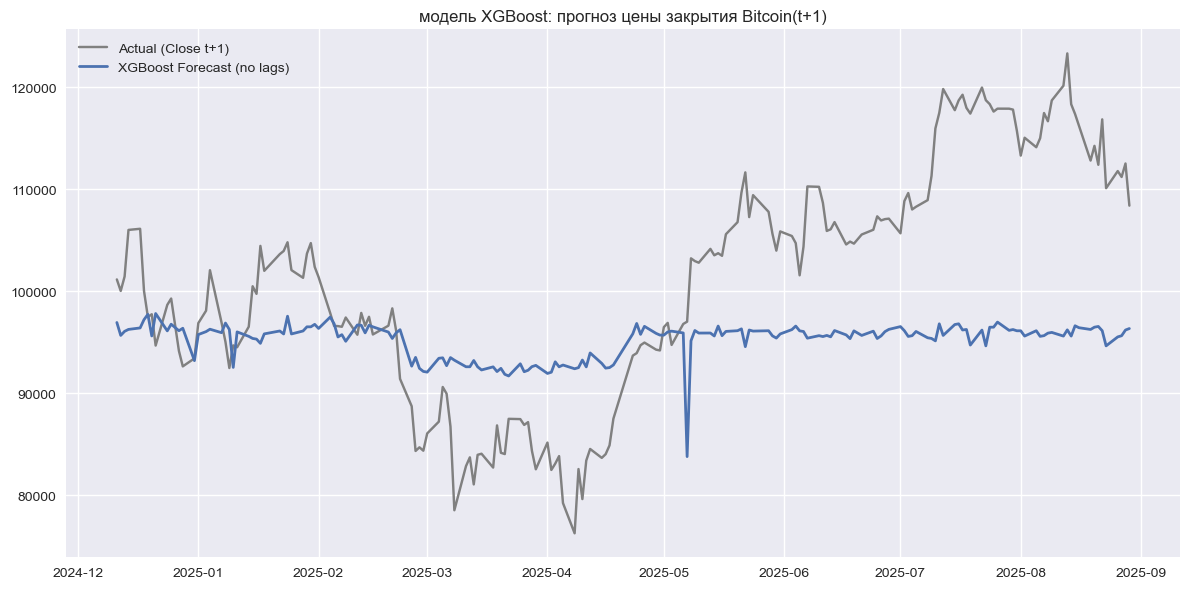

In [183]:
# === XGBoost для прогноза цены BTC (t+1) ===

from xgboost import XGBRegressor

# пункты 1-5 - в разделе формирование выборки

# 6) Обучение XGBoost (базовые параметры + early stopping)
xgb = XGBRegressor(
    n_estimators=1500,
    learning_rate=0.03,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1,
    objective="reg:squarederror",
    tree_method="hist",
    early_stopping_rounds=100,
    eval_metric="rmse"
)

xgb.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

# 7) Прогноз и метрики
y_pred_xg = xgb.predict(X_test)
rmse_xg = np.sqrt(mean_squared_error(y_test, y_pred_xg))
mae_xg  = mean_absolute_error(y_test, y_pred_xg)
mape_xg = (np.abs((y_test - y_pred_xg) / y_test)).mean() * 100

print(f"XGBoost | RMSE={rmse_xg:,.2f}  MAE={mae_xg:,.2f}  MAPE={mape_xg:,.2f}%")
print("Best iteration:", getattr(xgb, "best_iteration", None))

# Добавляем (сохраняем) метрики качества в файл models_metrics.csv
save_metrics("XGBoost", rmse_xg, mae_xg, mape_xg)
# print ("Метрики качества сохранены в файл \"models_metrics.csv\"")

# 8) Важность признаков
importances = pd.Series(xgb.feature_importances_, index=feature_cols).sort_values(ascending=False)
print("\nВажность признаков:\n", importances)

# 9) График: факт vs прогноз
plt.figure(figsize=(12,6))
plt.plot(dates_test, y_test.values, label="Actual (Close t+1)", color="gray")
plt.plot(dates_test, y_pred_xg, label="XGBoost Forecast (no lags)", linewidth=2)
plt.title("модель XGBoost: прогноз цены закрытия Bitcoin(t+1)")
plt.legend()
plt.tight_layout()
plt.show()


**Анализ полученных результатов (модель XGBoost):**<br>
Применение XGBoost без лагов показало среднюю относительную ошибку прогноза (MAPE) 9.23%, 
при средней абсолютной ошибке \\$9 637.86 и RMSE \\$11 780.89. 
Качество прогноза оказалось сопоставимым с результатами Random Forest и хуже, чем у линейной регрессии.  

Анализ важности признаков показал, что ключевым фактором прогноза остаётся текущая цена закрытия Bitcoin (76.4%). 
Некоторое влияние оказывают долгосрочный тренд (SMA_200 - 16%) и показатель волатильности (ATR_14 - 3.43%). 
Золото, индийская рупия и объём торгов имеют минимальное значение.  

Таким образом, XGBoost, несмотря на более сложный алгоритм, не смог превзойти по точности простую линейную модель, 
но дал более разнообразную картину распределения значимости факторов.

Пример прогноза цены закрытия Bitcoin модели XGBoost (последние 10 строк):


,Date,Actual_Close_t+1,Pred_Close_t+1,Error
170,2025-08-16,116252.312500,96437.078125,19815.234375
171,2025-08-19,112831.179688,96264.921875,16566.257812
172,2025-08-20,114274.742188,96489.695312,17785.046875
173,2025-08-21,112419.031250,96559.273438,15859.757812
174,2025-08-22,116874.085938,96140.640625,20733.445312
175,2025-08-23,110124.351562,94655.796875,15468.554688
176,2025-08-26,111802.656250,95534.945312,16267.710938
177,2025-08-27,111222.062500,95650.835938,15571.226562
178,2025-08-28,112544.804688,96209.500000,16335.304688
179,2025-08-29,108410.835938,96355.250000,12055.585938


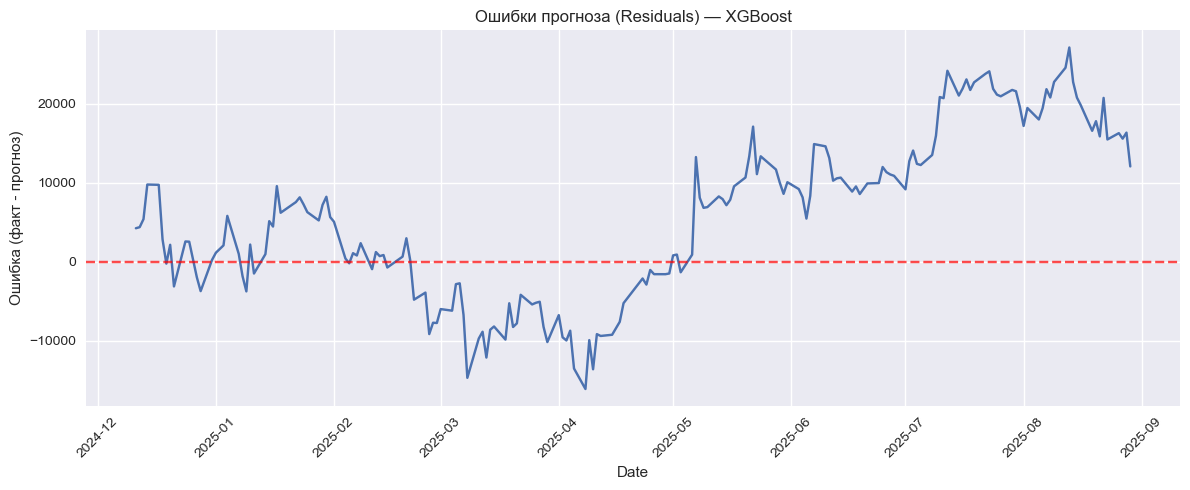

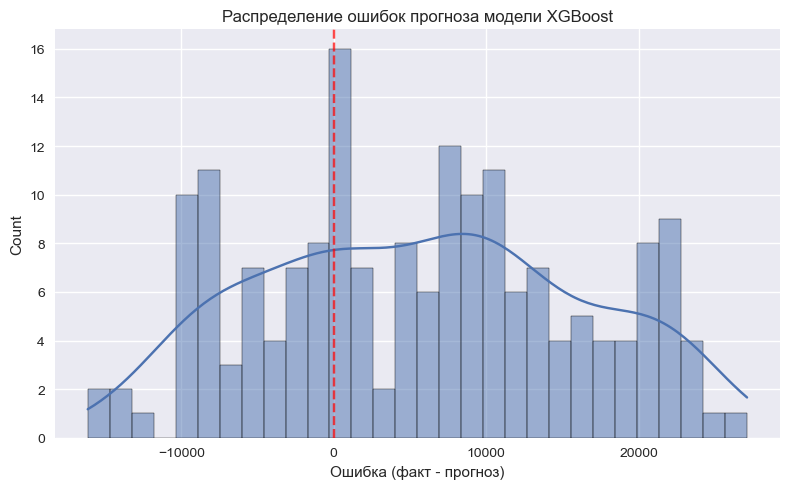

In [184]:
# === Дополнение: анализ ошибок прогноза модели XGBoost ===

# 1) Таблица с последними 10 строками прогноза
results_xg = pd.DataFrame({
    "Date": dates_test,
    "Actual_Close_t+1": y_test.values,
    "Pred_Close_t+1": y_pred_xg,
    "Error": y_test.values - y_pred_xg
}).reset_index(drop=True)                  # сбрасываем индекс, Date остаётся столбцом

print("Пример прогноза цены закрытия Bitcoin модели XGBoost (последние 10 строк):")
display(results_xg.tail(10))

# 2) График ошибок (residuals)
plt.figure(figsize=(12,5))
sns.lineplot(x=results_xg["Date"], y=results_xg["Error"])
plt.axhline(0, color="red", linestyle="--", alpha=0.7)
plt.title("Ошибки прогноза (Residuals) — XGBoost")
plt.ylabel("Ошибка (факт - прогноз)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3) Гистограмма ошибок
plt.figure(figsize=(8,5))
sns.histplot(results_xg["Error"], bins=30, kde=True)
plt.axvline(0, color="red", linestyle="--", alpha=0.7)
plt.title("Распределение ошибок прогноза модели XGBoost")
plt.xlabel("Ошибка (факт - прогноз)")
plt.tight_layout()

**Вывод:**<br>
Анализ ошибок XGBoost показывает выраженное смещение прогноза: начиная с весны 2025 года модель систематически недооценивает цену Bitcoin на величину до 20 000–25 000. Распределение ошибок смещено вправо, что подтверждает наличие систематической ошибки. Таким образом, XGBoost, несмотря на высокую гибкость, оказался неэффективным для прогноза волатильного временного ряда без дополнительных временных признаков.

---

### 7.4. LSTM (Long Short-Term Memory)

**LSTM (Long Short-Term Memory)** — это разновидность рекуррентных нейронных сетей (RNN), специально разработанная для работы с последовательными данными и временными рядами.

Особенности LSTM:
* способна «запоминать» информацию на длинных интервалах времени, что решает проблему затухающего/взрывающегося градиента в обычных RNN;
* хорошо подходит для прогнозирования временных рядов, особенно при наличии нелинейных зависимостей;
* используется в финансах, экономике и анализе криптовалют для предсказания цен.

В данном проекте LSTM позволит проверить, может ли нейросеть лучше уловить скрытые закономерности в динамике Bitcoin по сравнению с классическими моделями (Random Forest, XGBoost, линейная регрессия).

Метрики качества будут те же: RMSE, MAE, MAPE, что позволит сравнить нейросеть с остальными моделями.

План реализации LSTM
1. Подготовить данные:
* использовать только ряд Close (и, при желании, несколько признаков — Gold, SMA, Volume, ATR).
* нормализовать данные (нейросетям проще учиться на масштабированных значениях).
* сформировать обучающие последовательности (например, окно в 30 дней → прогноз на день вперёд).
2. Разделить на train/test (как у других моделей: последние 180 дней — тест).
3. Построить модель LSTM (Keras / TensorFlow):
* вход: окно цен/признаков,
* моделирование LSTM,
* выход: прогноз Close_t+1.
4. Обучить модель на train, протестировать на test.
5. Сравнить метрики (RMSE, MAE, MAPE) с другими моделями.


Лучшие веса с эпохи 8 (минимальная val_loss).


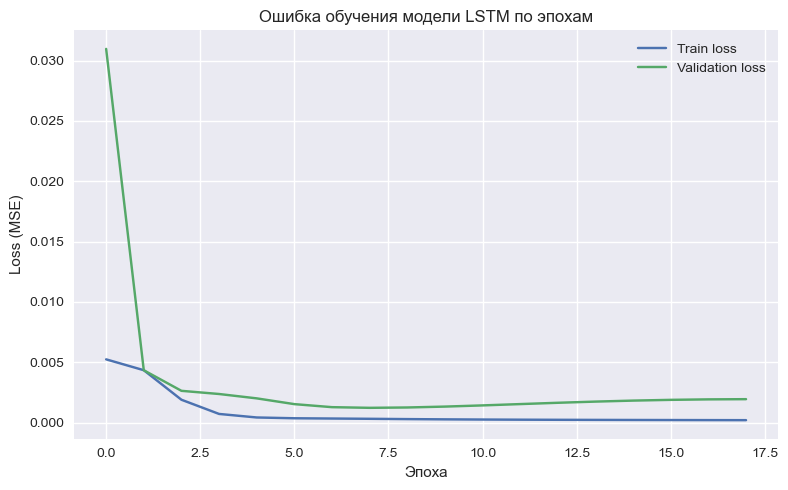

модель LSTM | RMSE=4,267.35  MAE=3,405.81  MAPE=3.36%
Метрики сохранены для LSTM → models_metrics.csv


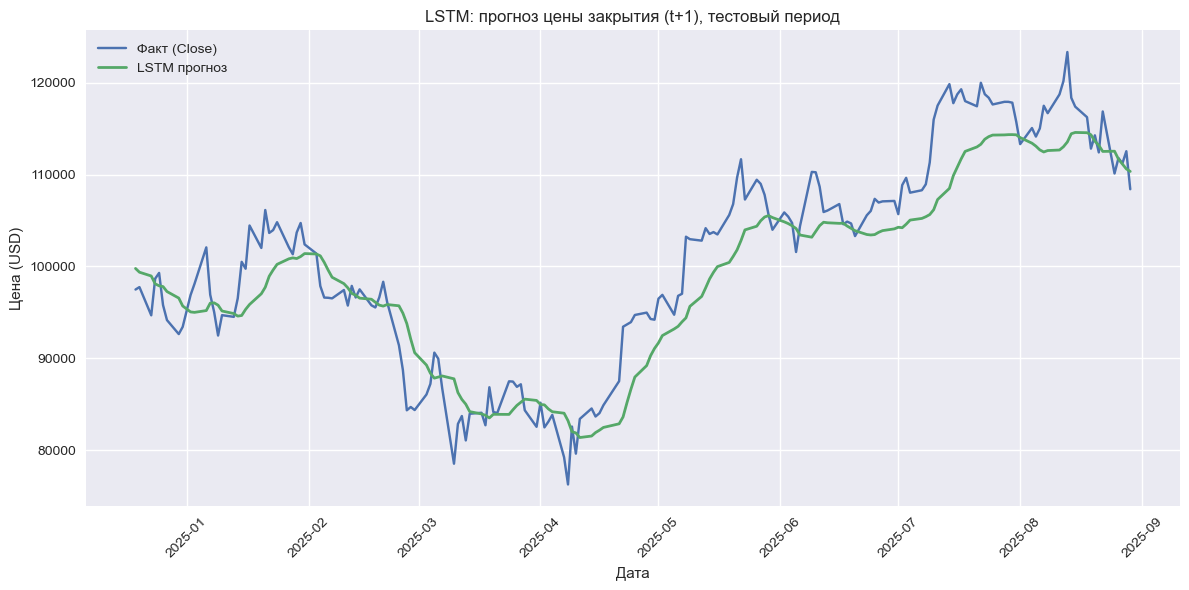

In [185]:
# === LSTM-прогноз Close на один день вперёд (окно 30 дней) ===


from keras import Input
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
from keras.utils import set_random_seed  # Keras 3
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ---------- фиксация случайности для воспроизводимости ----------
set_random_seed(42)     # фиксирует Python, NumPy и TF через Keras
np.random.seed(42)

# ---------- настройки ----------
TEST_DAYS = 180       # сколько последних дней оставляем на проверку
WINDOW = 30           # длина окна для LSTM

# ---------- загрузка данных ----------
df = pd.read_csv("final_merged_correllated.csv", parse_dates=["Date"]).sort_values("Date")
dates = df["Date"].values
values = df["Close"].astype("float32").values.reshape(-1, 1)

# ---------- масштабирование (fit только на train) ----------
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(values[:-TEST_DAYS])
values_scaled = scaler.transform(values).astype("float32")

# ---------- формирование окон ----------
X, y = [], []
for i in range(WINDOW, len(values_scaled)):
    X.append(values_scaled[i-WINDOW:i, 0])  # окно из WINDOW значений
    y.append(values_scaled[i, 0])           # целевое значение на t+1
X = np.asarray(X, dtype="float32").reshape(-1, WINDOW, 1)
y = np.asarray(y, dtype="float32")

dates_y = dates[WINDOW:]

# ---------- train / test ----------
split = len(y) - TEST_DAYS
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
dates_test = dates_y[split:]

# ---------- модель ----------
model = Sequential([
    Input(shape=(WINDOW, 1)),
    LSTM(32),
    Dense(1)
])
model.compile(optimizer="adam", loss="mse")

# ---------- коллбеки ----------
es = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

# ---------- обучение (без шифла — корректно для временных рядов) ----------
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,  # берёт хвост train'а, т.к. shuffle=False
    callbacks=[es],
    shuffle=False,
    verbose=0
)

best_epoch = es.stopped_epoch - es.patience + 1
print(f"Лучшие веса с эпохи {best_epoch} (минимальная val_loss).")

# ---------- график loss ----------
plt.figure(figsize=(8, 5))
plt.plot(history.history["loss"], label="Train loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.title("Ошибка обучения модели LSTM по эпохам")
plt.xlabel("Эпоха"); plt.ylabel("Loss (MSE)")
plt.legend(); plt.tight_layout()
plt.show()

# ---------- прогноз на тесте + обратное масштабирование ----------
y_pred_scaled = model.predict(X_test, verbose=0).reshape(-1, 1).astype("float32")
y_test_scaled = y_test.reshape(-1, 1).astype("float32")

y_pred_lstm = scaler.inverse_transform(y_pred_scaled).ravel()
y_test_inv  = scaler.inverse_transform(y_test_scaled).ravel()

# ---------- метрики ----------
rmse_lstm = float(np.sqrt(mean_squared_error(y_test_inv, y_pred_lstm)))
mae_lstm  = float(mean_absolute_error(y_test_inv, y_pred_lstm))
mape_lstm = float((np.abs((y_test_inv - y_pred_lstm) / y_test_inv)).mean() * 100)

print(f"модель LSTM | RMSE={rmse_lstm:,.2f}  MAE={mae_lstm:,.2f}  MAPE={mape_lstm:,.2f}%")

# ---------- сохранение метрик с перезаписью строки модели и сортировкой ----------
save_metrics("LSTM", rmse_lstm, mae_lstm, mape_lstm)

# ---------- график факт vs прогноз ----------
plt.figure(figsize=(12, 6))
plt.plot(dates_test, y_test_inv, label="Факт (Close)")
plt.plot(dates_test, y_pred_lstm, label="LSTM прогноз", linewidth=2)
plt.title("LSTM: прогноз цены закрытия (t+1), тестовый период")
plt.xlabel("Дата"); plt.ylabel("Цена (USD)")
plt.legend(); plt.xticks(rotation=45); plt.tight_layout()
plt.show()

**Анализ полученных результатов (модель LSTM):**<br>
Результаты обучения LSTM показали высокую точность (MAPE < 4%), устойчивость модели без признаков переобучения и хорошее соответствие прогноза фактической динамике цены Bitcoin. В отличие от линейной регрессии и деревьев решений (Random Forest, XGBoost), LSTM эффективно улавливает долгосрочные и краткосрочные зависимости, что делает её наиболее подходящей моделью для прогноза криптовалютного ряда.

Пример прогноза цены закрытия Bitcoin модели LSTM (первые 10 строк):


,Date,Actual_Close,Pred_Close,Error
0,2024-12-19,97490.953125,99785.968750,-2295.015625
1,2024-12-20,97755.929688,99376.867188,-1620.937500
2,2024-12-23,94686.242188,98966.328125,-4280.085938
3,2024-12-24,98676.093750,98113.273438,562.820312
4,2024-12-25,99299.195312,97897.289062,1401.906250
5,2024-12-26,95795.515625,97813.898438,-2018.382812
6,2024-12-27,94164.859375,97272.898438,-3108.039062
7,2024-12-30,92643.210938,96561.445312,-3918.234375
8,2024-12-31,93429.203125,95701.890625,-2272.687500
9,2025-01-02,96886.875000,95053.156250,1833.718750


Пример прогноз цены закрытия Bitcoin модели LSTM (последние 10 строк):


,Date,Actual_Close,Pred_Close,Error
170,2025-08-18,116252.304688,114561.632812,1690.671875
171,2025-08-19,112831.187500,114336.960938,-1505.773438
172,2025-08-20,114274.734375,113641.531250,633.203125
173,2025-08-21,112419.023438,113188.031250,-769.007812
174,2025-08-22,116874.093750,112524.156250,4349.937500
175,2025-08-25,110124.351562,112547.664062,-2423.312500
176,2025-08-26,111802.664062,111683.164062,119.500000
177,2025-08-27,111222.054688,111158.023438,64.031250
178,2025-08-28,112544.796875,110618.812500,1925.984375
179,2025-08-29,108410.828125,110346.656250,-1935.828125


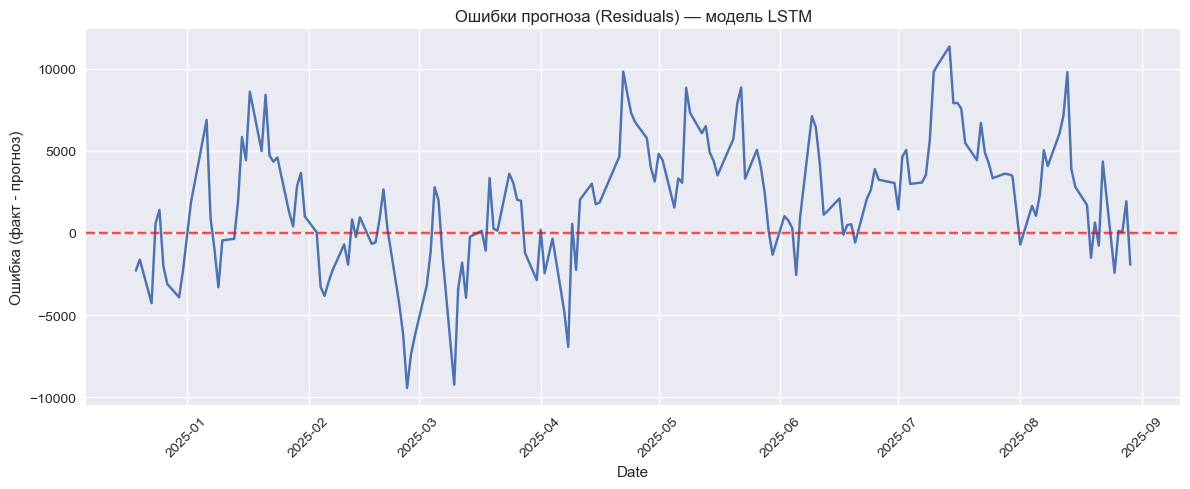

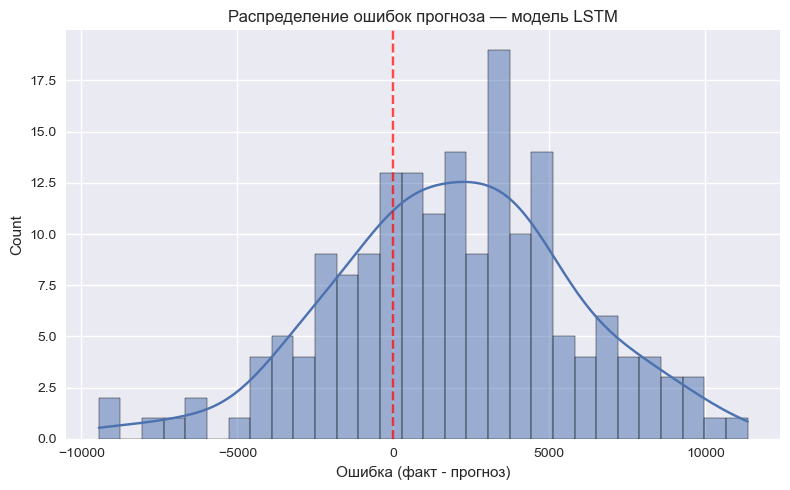

In [186]:
# === Дополнение: анализ ошибок прогноза модели LSTM ===
import seaborn as sns

# 1) Таблица с первыми/последними строками прогноза
results_lstm = pd.DataFrame({
    "Date": dates_test,
    "Actual_Close": y_test_inv,
    "Pred_Close": y_pred_lstm,
    "Error": y_test_inv - y_pred_lstm
}).reset_index(drop=True)

print("Пример прогноза цены закрытия Bitcoin модели LSTM (первые 10 строк):")
display(results_lstm.head(10))

print("Пример прогноз цены закрытия Bitcoin модели LSTM (последние 10 строк):")
display(results_lstm.tail(10))

# 2) График ошибок (residuals) по времени
plt.figure(figsize=(12,5))
sns.lineplot(x=results_lstm["Date"], y=results_lstm["Error"])
plt.axhline(0, color="red", linestyle="--", alpha=0.7)
plt.title("Ошибки прогноза (Residuals) — модель LSTM")
plt.ylabel("Ошибка (факт - прогноз)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3) Гистограмма ошибок
plt.figure(figsize=(8,5))
sns.histplot(results_lstm["Error"], bins=30, kde=True)
plt.axvline(0, color="red", linestyle="--", alpha=0.7)
plt.title("Распределение ошибок прогноза — модель LSTM")
plt.xlabel("Ошибка (факт - прогноз)")
plt.tight_layout()
plt.show()

**Вывод:**<br>
Анализ остатков модели LSTM показывает, что ошибки распределены вокруг нуля и близки к нормальному закону. В отличие от Random Forest и XGBoost, где наблюдается сильное смещение, в случае LSTM остатки остаются сбалансированными, а величина ошибок значительно ниже. Незначительное смещение в сторону положительных ошибок (факт выше прогноза) указывает на тенденцию модели слегка недооценивать цену, однако в целом LSTM демонстрирует одно из лучших качеств прогноза среди всех протестированных моделей.

###  7.5. Многопризнаковая (мультифичерная) модель LSTM

Следующий шаг — расширение входа за счёт информативных признаков, описывающих состояние рынка и внешнюю среду. Мы включаем в окно помимо `Close` долгосрочную скользящую среднюю (`SMA_200`) как индикатор рыночного режима, объём торгов (`Volume`) как прокси активности и ликвидности, средний истинный диапазон (`ATR_14`) как меру текущей волатильности, а также внешние макро-факторы — цену золота (`Gold`) и курс индийской рупии (`INR`), отражающие глобальные потоки капитала и настроения риска. Технически это означает переход от одномерного входа к тензору признаков: каждый временной фрагмент теперь содержит матрицу размера «дни × признаки», при этом целевая переменная остаётся прежней — цена закрытия на следующий день. Масштабирование выполняется совместно для всех признаков по обучающей части, однако обратное преобразование для расчёта метрик проводится только по целевой колонке Close, чтобы получить ошибки в долларах США. Особое внимание уделяется синхронизации источников и корректной причинности: все вычисляемые индикаторы должны использовать исключительно информацию прошлого, без «заглядывания» за границу прогнозируемого момента.

Включение внешних и технических факторов позволяет части «необъяснённой» ранее вариабельности стать предсказуемой: волатильность, смены режимов и кросс-рыночные влияния начинают отражаться во входе, а не остаются в остатках. На практике это обычно приводит к снижению `RMSE`, `MAE` и `MAPE` относительно базовой модели, хотя величина эффекта зависит от качества синхронизации данных и реальной информативности признаков.

Такой переход — от чистого прогноза по `Close` к многопризнаковой LSTM — позволяет сохранить прозрачность и воспроизводимость базовой постановки и одновременно добавить рыночный контекст там, где он действительно повышает предсказательную способность модели.

Train: (2286, 30, 6), Val: (254, 30, 6), Test: (180, 30, 6)
Лучшие веса с эпохи 14 (минимум val_loss).


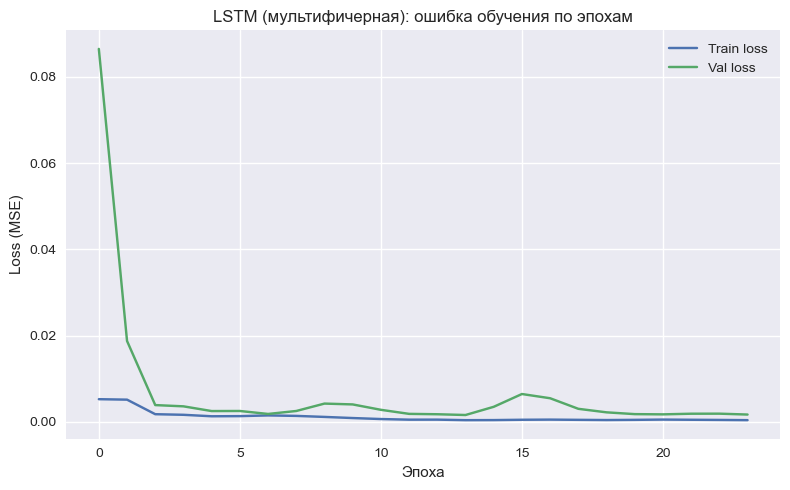

LSTM (multifeatures) | RMSE=7,539.22  MAE=6,463.17  MAPE=6.40%
Метрики сохранены для LSTM (multifeatures) → models_metrics.csv


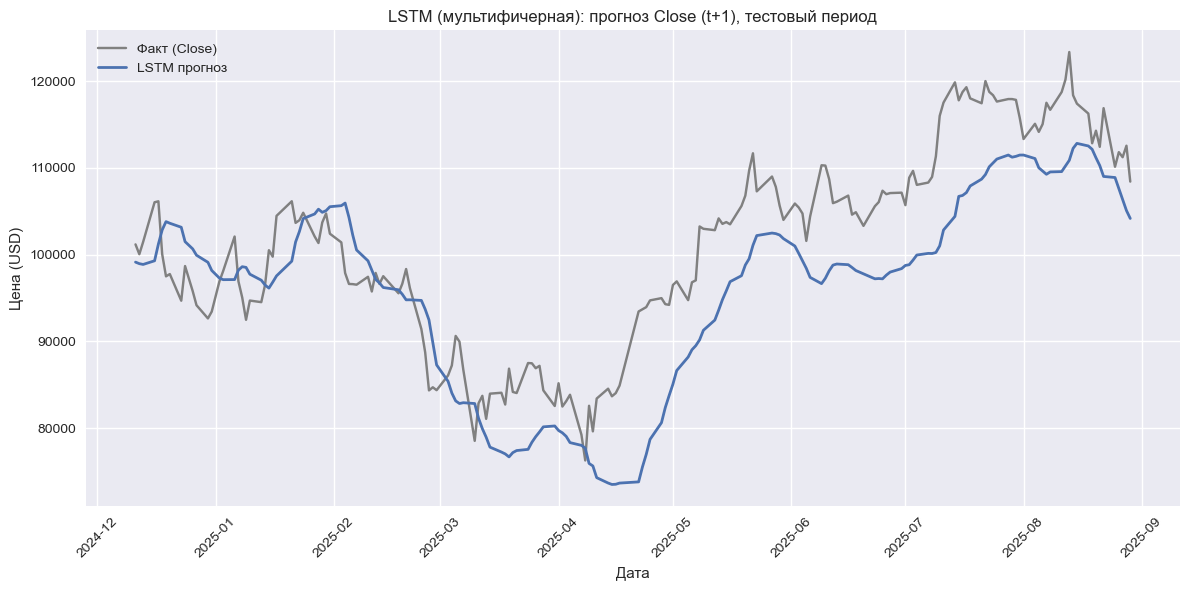

In [187]:
# === LSTM (многопризнаковая, t+1) ===

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# --- 0) Контроль воспроизводимости
np.random.seed(42)
tf.random.set_seed(42)

# --- 1) Настройки
TEST_DAYS = 180
WINDOW = 30
FEATURES = ["Close", "SMA_200", "Volume", "ATR_14", "Gold", "INR"]  # Close должен быть ПЕРВЫМ!

# --- 2) Загрузка данных
df = pd.read_csv("final_merged_correllated.csv", parse_dates=["Date"]).sort_values("Date")
# проверим колонки
# missing = [c for c in FEATURES if c not in df.columns]
# if missing:
#     raise ValueError(f"Отсутствуют признаки в датасете: {missing}")

# убираем строки с NaN по нужным признакам
df = df[["Date"] + FEATURES].dropna().reset_index(drop=True)

dates = df["Date"].values
values = df[FEATURES].astype(float).values               # shape: (T, n_features)
n_features = values.shape[1]

# --- 3) Масштабирование (fit только на train)
scaler = MinMaxScaler()
scaler.fit(values[:-TEST_DAYS])                          # только train
values_scaled = scaler.transform(values)

# --- 4) Формирование окон: X: (N, WINDOW, n_features), y: Close(t+1) в масштабе [0,1]
X = np.array([values_scaled[i-WINDOW:i, :] for i in range(WINDOW, len(values_scaled))])
y = values_scaled[WINDOW:, 0]                            # целевая = Close (0-й столбец)
dates_y = dates[WINDOW:]

# --- 5) Сплит по последним 180 днмя (TEST_DAYS)
split = len(y) - TEST_DAYS
X_train_full, X_test = X[:split], X[split:]
y_train_full, y_test = y[:split], y[split:]
dates_test = dates_y[split:]

# сделаем валидацию как «хвост» train (10% train, минимум 64 наблюдения)
val_size = max(int(0.1 * len(X_train_full)), 64)
X_train, X_val = X_train_full[:-val_size], X_train_full[-val_size:]
y_train, y_val = y_train_full[:-val_size], y_train_full[-val_size:]

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

# --- 6) Модель LSTM (1 слой)
model = Sequential([
    Input(shape=(WINDOW, n_features)),
    LSTM(32),
    Dense(1)
])
model.compile(optimizer="adam", loss="mse")

# --- 7) Обучение
es = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
rlr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, min_lr=1e-5, verbose=0)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[es, rlr],
    shuffle=False,          # важно для временных рядов
    verbose=0
)

best_epoch = (es.stopped_epoch - es.patience + 1) if es.stopped_epoch > 0 else np.argmin(history.history["val_loss"]) + 1
print(f"Лучшие веса с эпохи {best_epoch} (минимум val_loss).")

# --- 8) Кривые обучения
plt.figure(figsize=(8,5))
plt.plot(history.history["loss"], label="Train loss")
plt.plot(history.history["val_loss"], label="Val loss")
plt.title("LSTM (мультифичерная): ошибка обучения по эпохам")
plt.xlabel("Эпоха"); plt.ylabel("Loss (MSE)")
plt.legend(); plt.tight_layout(); plt.show()

# --- 9) Прогноз на тесте + обратное масштабирование ТОЛЬКО для Close
y_pred_scaled = model.predict(X_test, verbose=0).reshape(-1, 1)
y_test_scaled = y_test.reshape(-1, 1)

Z_pred = np.zeros((len(y_pred_scaled), n_features))
Z_true = np.zeros((len(y_test_scaled), n_features))
Z_pred[:, 0] = y_pred_scaled[:, 0]   # 0-й столбец — Close
Z_true[:, 0] = y_test_scaled[:, 0]

y_pred_lstm_mult = scaler.inverse_transform(Z_pred)[:, 0]
y_test_inv = scaler.inverse_transform(Z_true)[:, 0]

# --- 10) Метрики
rmse_lstm_mult = np.sqrt(mean_squared_error(y_test_inv, y_pred_lstm_mult))
mae_lstm_mult  = mean_absolute_error(y_test_inv, y_pred_lstm_mult)
mape_lstm_mult = np.mean(np.abs((y_test_inv - y_pred_lstm_mult) / y_test_inv)) * 100

print(f"LSTM (multifeatures) | RMSE={rmse_lstm_mult:,.2f}  MAE={mae_lstm_mult:,.2f}  MAPE={mape_lstm_mult:,.2f}%")

# Добавляем (сохраняем) метрики качества в файл models_metrics.csv
save_metrics("LSTM (multifeatures)", rmse_lstm_mult, mae_lstm_mult, mape_lstm_mult)
# print ("Метрики качества сохранены в файл \"models_metrics.csv\"")

# --- 11) Визуализация: факт vs прогноз (тест)
plt.figure(figsize=(12,6))
plt.plot(dates_test, y_test_inv, label="Факт (Close)", color="gray")
plt.plot(dates_test, y_pred_lstm_mult, label="LSTM прогноз", linewidth=2)
plt.title("LSTM (мультифичерная): прогноз Close (t+1), тестовый период")
plt.xlabel("Дата"); plt.ylabel("Цена (USD)")
plt.legend(); plt.xticks(rotation=45); plt.tight_layout(); plt.show()

**Вывод:**<br>
Анализ мультифичерной модели LSTM показал, что при использовании нескольких входных признаков качество прогноза ухудшилось по сравнению с одномерной LSTM (MAPE увеличился с 3.36% до 6.40%). Модель хорошо улавливает общие тренды, но сглаживает динамику и систематически недооценивает пики. Это может свидетельствовать о том, что добавленные признаки вносят дополнительный шум и не улучшают качество прогноза для данного временного ряда.

Пример прогноза цены закрытия Bitcoin модели LSTM (multifeatures) (первые 10 строк):


,Date,Actual_Close,Pred_Close,Error
0,2024-12-11,101173.031250,99785.968750,2042.670871
1,2024-12-12,100043.000000,99376.867188,1090.113425
2,2024-12-13,101459.257812,98966.328125,2595.976127
3,2024-12-16,106029.718750,98113.273438,6745.682894
4,2024-12-17,106140.601562,97897.289062,4934.115155
5,2024-12-18,100041.539062,97813.898438,-2802.685970
6,2024-12-19,97490.953125,97272.898438,-6307.190628
7,2024-12-20,97755.929688,96561.445312,-5855.501541
8,2024-12-23,94686.242188,95701.890625,-8463.253006
9,2024-12-24,98676.093750,95053.156250,-2815.461292


Пример прогноз цены закрытия Bitcoin модели LSTM (multifeatures) (последние 10 строк):


,Date,Actual_Close,Pred_Close,Error
170,2025-08-18,116252.312500,114561.632812,3733.541712
171,2025-08-19,112831.179688,114336.960938,696.523278
172,2025-08-20,114274.742188,113641.531250,3116.263037
173,2025-08-21,112419.031250,113188.031250,2159.490325
174,2025-08-22,116874.085938,112524.156250,7869.144259
175,2025-08-25,110124.351562,112547.664062,1243.223010
176,2025-08-26,111802.656250,111683.164062,4193.724507
177,2025-08-27,111222.062500,111158.023438,4917.419340
178,2025-08-28,112544.804688,110618.812500,7469.006502
179,2025-08-29,108410.835938,110346.656250,4248.458296


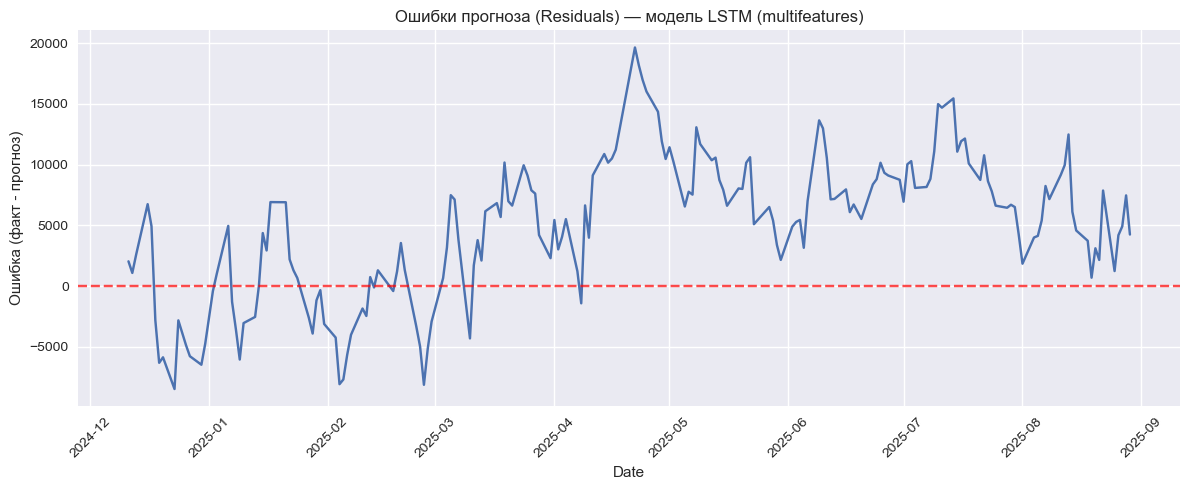

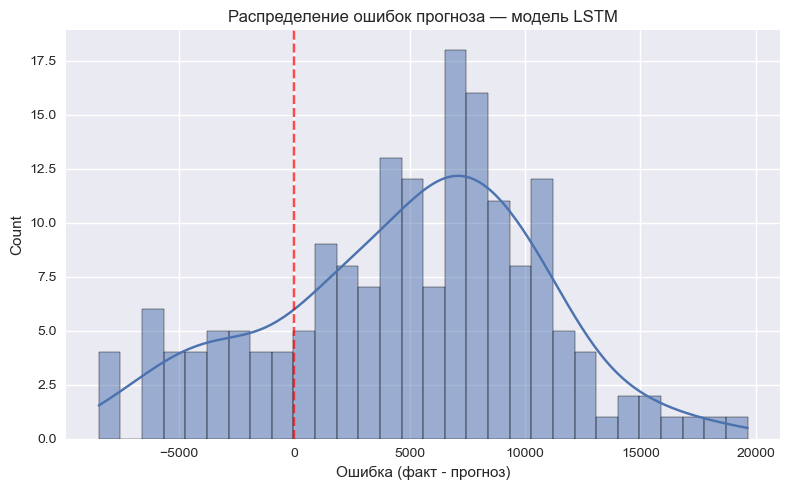

In [188]:
# === Дополнение: анализ ошибок прогноза модели LSTM (multifeatures) ===
import seaborn as sns

# 1) Таблица с первыми/последними строками прогноза
results_lstm_mult = pd.DataFrame({
    "Date": dates_test,
    "Actual_Close": y_test_inv,
    "Pred_Close": y_pred_lstm,
    "Error": y_test_inv - y_pred_lstm_mult
}).reset_index(drop=True)

print("Пример прогноза цены закрытия Bitcoin модели LSTM (multifeatures) (первые 10 строк):")
display(results_lstm_mult.head(10))

print("Пример прогноз цены закрытия Bitcoin модели LSTM (multifeatures) (последние 10 строк):")
display(results_lstm_mult.tail(10))

# 2) График ошибок (residuals) по времени
plt.figure(figsize=(12,5))
sns.lineplot(x=results_lstm_mult["Date"], y=results_lstm_mult["Error"])
plt.axhline(0, color="red", linestyle="--", alpha=0.7)
plt.title("Ошибки прогноза (Residuals) — модель LSTM (multifeatures)")
plt.ylabel("Ошибка (факт - прогноз)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3) Гистограмма ошибок
plt.figure(figsize=(8,5))
sns.histplot(results_lstm_mult["Error"], bins=30, kde=True)
plt.axvline(0, color="red", linestyle="--", alpha=0.7)
plt.title("Распределение ошибок прогноза — модель LSTM")
plt.xlabel("Ошибка (факт - прогноз)")
plt.tight_layout()
plt.show()

**Вывод:**<br>
Модель LSTM только на Close оказалась точнее и стабильнее, чем мультифичерная: на тесте ошибка ниже (примерно MAPE 3.36% против 6.46%, RMSE ~4.27k против 7.54k USD).
У мультифичерной модели заметна систематическая недооценка на ростах: кривая запаздывает, а ошибки в пиках доходят до +10–15 тыс. Это значит, что добавленные в текущем виде признаки скорее добавляют шум, чем помогают (частично дублируют Close, могут не иметь устойчивой связи с целевой переменной).


---
---

## 8. Интерпретация результатов

#### Чтение (выгрузка) файла с отсрортированными результатами метрик качества моделей при прогнозировании цены закрытия Bitcoin (t+1)

In [189]:
df_results = pd.read_csv("models_metrics.csv").sort_values(by="MAPE, %", ascending=True)
df_results

,RunTimestamp,Model,"RMSE, $","MAE, $","MAPE, %"
3,2025-09-25 18:08:21,LinearRegression,2445.73,1867.67,1.90
6,2025-09-25 18:09:09,LSTM,4267.35,3405.81,3.36
7,2025-09-25 18:09:57,LSTM (multifeatures),7539.22,6463.17,6.40
1,2025-09-25 18:07:01,SARIMA,10534.82,8169.51,8.69
2,2025-09-25 18:07:41,Auto-ARIMA/SARIMA,10539.07,8213.40,8.71
4,2025-09-25 18:08:29,Random Forest,11354.30,9458.95,9.18
5,2025-09-25 18:08:37,XGBoost,11780.89,9637.86,9.23
0,2025-09-25 18:06:52,ARIMA,11360.31,9592.98,9.73


**Результаты моделирования**

По итогам сравнения моделей на тестовом периоде лучший результат показала **линейная регрессия**: средняя ошибка в процентах около 1,9%, что заметно лучше остальных методов. На втором месте — **LSTM только на Close** с ошибкой примерно 3,36%. Остальные подходы (мультифичерная LSTM, ARIMA/SARIMA/Auto-ARIMA, Random Forest, XGBoost) уступают: их ошибки выше, местами почти вдвое.

Такой результат логичен для прогноза на один день вперёд. Завтрашняя цена чаще всего близка к сегодняшней, поэтому простая модель, которая опирается на недавние значения, справляется особенно хорошо. Однофакторная LSTM тоже улавливает эту зависимость, но чуть сильнее сглаживает резкие движения, поэтому проигрывает линейной модели.

Добавление внешних признаков (мультифичерная LSTM) в текущем виде пользы не принесло. На графиках видно запаздывание и устойчивая недооценка в периоды роста; ошибки выше (MAPE ≈ 6,4%). Вероятные причины просты: часть добавленных рядов дублирует информацию из Close, часть — «шумит» и может быть не идеально согласована по времени с биткоином. В результате модель получает лишние колебания во входных данных и начинает ошибаться чаще.

Практический вывод для проекта.
На текущем горизонте (t+1) разумно принять линейную регрессию как основную рабочую модель, а LSTM на Close — как альтернативу для контроля и дальнейших экспериментов.



**Вывод:**
Лучшими моделями для прикладного прогнозирования курса Bitcoin в данном исследовании оказались Линейная регрессия и LSTM, обе показали ошибки MAPE менее 4%. На текущем горизонте (t+1) разумно принять линейную регрессию как основную рабочую модель, а LSTM на Close — как альтернативу для контроля и дальнейших экспериментов.

---
---

## 9. Заключение

Выполнение данного проекта позволило провести полный цикл исследования по прогнозированию цены Bitcoin. Работа включала несколько этапов: сбор и очистку данных, исследовательский анализ, формирование выборки признаков и построение моделей прогнозирования.

На первом этапе были собраны и подготовлены данные, включающие не только котировки самой криптовалюты, но и дополнительные показатели — цены золота, нефти, валютные курсы и технические индикаторы. Это позволило более широко взглянуть на возможные факторы, влияющие на движение цены Bitcoin.

Исследовательский анализ данных показал, что котировки криптовалюты обладают высокой волатильностью, слабо выраженной сезонностью и заметной зависимостью от внешних факторов. Отдельные индикаторы и макроэкономические показатели продемонстрировали определённую связь с динамикой Bitcoin, однако на практике их влияние оказалось менее значимым по сравнению с самим историческим рядом цен.

В рамках моделирования были протестированы разные подходы.

* Классические статистические модели (ARIMA, SARIMA, auto-ARIMA) показали ограниченные результаты: они хорошо улавливают тренды и сезонность, но при высокой нестабильности рынка их точность оказалась недостаточной.
* Модели машинного обучения (Random Forest, XGBoost) продемонстрировали средние результаты: они способны учитывать несколько признаков, но переобучаются и не всегда дают стабильный прогноз.
* Нейросетевые модели (LSTM) подтвердили свою эффективность в работе с временными рядами: они лучше улавливают сложные зависимости во временных данных, хотя требуют больше ресурсов и времени на обучение.
* Простая линейная регрессия неожиданно показала себя как достаточно надёжная модель: при прогнозе на один день вперёд она обеспечила минимальную ошибку и стабильный результат.

Сравнение полученных моделей показало, что для краткосрочного прогноза (на один день вперёд) наиболее эффективными являются линейная регрессия и LSTM на основе одного признака (цены закрытия). Эти модели оказались простыми в использовании и дали наиболее точный результат.

Практическая ценность проекта заключается в том, что он позволяет сделать прогноз более обоснованным и системным. Даже если точность прогноза нельзя считать идеальной, применение статистических и машинных моделей даёт возможность снизить элемент случайности и принимать решения, опираясь на данные.

В перспективе развитие проекта может идти в двух направлениях. Во-первых, можно расширить набор признаков, добавив больше макроэкономических индикаторов и данных с криптовалютного рынка (например, объём транзакций или показатели майнинга). Во-вторых, можно строить гибридные модели, объединяющие достоинства статистических методов и нейросетей. Такой подход способен повысить точность прогноза и сделать его более устойчивым.

В целом проект показал, что использование методов анализа данных и машинного обучения применимо для прогнозирования цен криптовалют. Несмотря на высокую неопределённость этого рынка, комбинация грамотного анализа данных и выбора подходящей модели может дать практические результаты, которые будут полезны как исследователям, так и инвесторам.



---
---
---

###  Для дашборда: Датасет с прогнозами и ошибками прогнозов моделей

In [199]:
# 1. Сначала формируем базу с Actual
df_preds = pd.DataFrame({
    "Date": dates_test,
    "Actual": y_test.values if "y_test_inv" not in locals() else y_test_inv
})

# 2. Добавляем прогнозы
df_preds["ARIMA"] = np.asarray(arima_pred).reshape(-1)
df_preds["SARIMA"] = np.asarray(sarima_pred).reshape(-1)
df_preds["Auto-ARIMA/SARIMA"] = np.asarray(forecast).reshape(-1)
df_preds["Linear"] = y_pred_ln
df_preds["RF"] = y_pred_rf
df_preds["XGBoost"] = y_pred_xg
df_preds["LSTM"] = y_pred_lstm
df_preds["LSTM_mult"] = y_pred_lstm_mult

# 3. Считаем ошибки (остатки)
for col in ["ARIMA", "SARIMA", "Auto-ARIMA/SARIMA", "Linear", "RF", "XGBoost", "LSTM", "LSTM_mult"]:
    df_preds[f"Error_{col}"] = df_preds["Actual"] - df_preds[col]

# 4. Сохраняем
df_preds.to_csv("predictions_test_all_models.csv", index=False)
print("Сохранено: predictions_test_all_models.csv")

display(df_preds.tail(10))
df_preds.shape

Сохранено: predictions_test_all_models.csv


,Date,Actual,ARIMA,SARIMA,Auto-ARIMA/SARIMA,Linear,RF,XGBoost,LSTM,LSTM_mult,Error_ARIMA,Error_SARIMA,Error_Auto-ARIMA/SARIMA,Error_Linear,Error_RF,Error_XGBoost,Error_LSTM,Error_LSTM_mult
170,2025-08-18,116252.312500,100283.368844,107042.963026,106746.754896,117607.426626,97266.371979,96437.078125,114561.632812,112518.770788,15968.943656,9209.349474,9505.557604,-1355.114126,18985.940521,19815.234375,1690.679687,3733.541712
171,2025-08-19,112831.179688,100283.368844,107116.271001,106784.624297,116476.298952,97244.622370,96264.921875,114336.960938,112134.656410,12547.810843,5714.908686,6046.555390,-3645.119265,15586.557318,16566.257812,-1505.781250,696.523278
172,2025-08-20,114274.742188,100283.368844,107151.580906,106822.493699,113060.507869,97251.872240,96489.695312,113641.531250,111158.479150,13991.373343,7123.161281,7452.248489,1214.234319,17022.869948,17785.046875,633.210938,3116.263037
173,2025-08-21,112419.031250,100283.368844,107169.859536,106860.363100,114499.984184,97266.371979,96559.273438,113188.031250,110259.540925,12135.662406,5249.171714,5558.668150,-2080.952934,15152.659271,15859.757813,-769.000000,2159.490325
174,2025-08-22,116874.085938,100283.368844,107240.043999,106898.232502,112622.315434,97202.965755,96140.640625,112524.156250,109004.941678,16590.717093,9634.041938,9975.853436,4251.770503,19671.120182,20733.445312,4349.929688,7869.144259
175,2025-08-25,110124.351562,100283.368844,107301.206034,106936.101903,117137.816461,97115.744922,94655.796875,112547.664062,108881.128552,9840.982718,2823.145528,3188.249659,-7013.464898,13008.606641,15468.554687,-2423.312500,1243.223010
176,2025-08-26,111802.656250,100283.368844,107330.573591,106973.971305,110424.046607,96973.368646,95534.945312,111683.164062,107608.931743,11519.287406,4472.082659,4828.684945,1378.609643,14829.287604,16267.710938,119.492188,4193.724507
177,2025-08-27,111222.062500,100283.368844,107321.312299,107011.840706,112055.243324,97095.498854,95650.835938,111158.023438,106304.643160,10938.693656,3900.750201,4210.221794,-833.180824,14126.563646,15571.226562,64.039062,4917.419340
178,2025-08-28,112544.804688,100283.368844,107394.620686,107049.710108,111463.359399,97259.069714,96209.500000,110618.812500,105075.798185,12261.435843,5150.184001,5495.094580,1081.445289,15285.734974,16335.304688,1925.992188,7469.006502
179,2025-08-29,108410.835938,100283.368844,107429.930209,107087.579509,112781.527708,97202.965755,96355.250000,110346.656250,104162.377641,8127.467093,980.905729,1323.256428,-4370.691771,11207.870182,12055.585938,-1935.820312,4248.458296


(180, 18)